World coordinates of the corners:
Corner 1: RA = -101.56072354699235, Dec = -37.10694062229142
Corner 2: RA = -101.56974467100763, Dec = -37.10694062229142
Corner 3: RA = -101.56072395221949, Dec = -37.10013506688084
Corner 4: RA = -101.56974426578049, Dec = -37.10013506688084


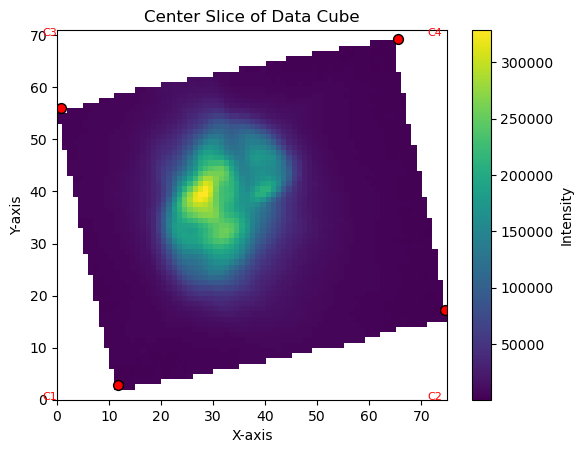

In [34]:
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt
import numpy as np

# Load the FITS file
file_name = "/Users/mary/Fits image of JWST/ngc6302_ch4-long_s3d.fits"
hdul = fits.open(file_name)

# Access the correct HDU that contains the data
data_hdu = hdul[1]  # Change the index if necessary

# Access the data
data = data_hdu.data

# Check if data is not None
if data is not None:
    # Calculate the center slice if data is 3D
    if data.ndim == 3:
        center_z = data.shape[0] // 2
        data_slice = data[center_z, :, :]
    else:
        data_slice = data

    # Convert data to a float type if necessary
    data_slice = np.array(data_slice, dtype=np.float32)

    # Calculate the dimensions of the data slice
    height, width = data_slice.shape

    # Define the corner pixel coordinates
    pixel_corners = [(0, 0), (width - 1, 0), (0, height - 1), (width - 1, height - 1)]

    # Extract WCS information from the header
    wcs = WCS(data_hdu.header, naxis=2)

    # Convert pixel coordinates to world coordinates
    world_corners = wcs.pixel_to_world_values([corner for corner in pixel_corners])

    # Print the world coordinates of the corners
    print("World coordinates of the corners:")
    for i, (x, y) in enumerate(world_corners):
        print(f"Corner {i+1}: RA = {x}, Dec = {y}")

    # Plot the data with corner annotations
    plt.imshow(data_slice, origin='lower', cmap='viridis', extent=(0, width, 0, height))
    plt.colorbar(label='Intensity')
    plt.title('Center Slice of Data Cube')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')

    # Annotate the corners
    for i, (px, py) in enumerate(pixel_corners):
        plt.annotate(f'C{i+1}', (px, py), color='red', fontsize=8, ha='right')

    # Define the specific points to highlight
    specific_points = [
        (11.7641, 2.79749),
        (0.795407, 56.0104),
        (65.4217, 69.2025),
        (74.6117, 17.3236)
    ]

    # Plot the specific points with red circles
    for x, y in specific_points:
        plt.scatter(x, y, color='red', s=50, edgecolor='black', marker='o')

    plt.savefig('center_slice_with_world_corners.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("No data found in the specified HDU.")

# Close the FITS file
hdul.close()


World coordinates of the corners:
Corner 1: RA = -101.56072354699235, Dec = -37.10694062229142
Corner 2: RA = -101.56974467100763, Dec = -37.10694062229142
Corner 3: RA = -101.56072395221949, Dec = -37.10013506688084
Corner 4: RA = -101.56974426578049, Dec = -37.10013506688084


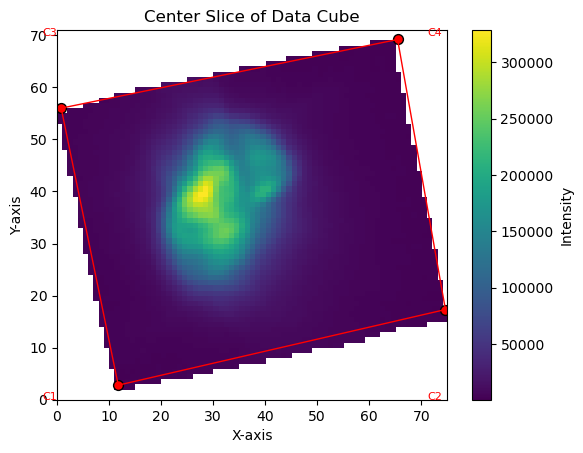

In [35]:
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt
import numpy as np

# Load the FITS file
file_name = "/Users/mary/Fits image of JWST/ngc6302_ch4-long_s3d.fits"
hdul = fits.open(file_name)

# Access the correct HDU that contains the data
data_hdu = hdul[1]  # Change the index if necessary

# Access the data
data = data_hdu.data

# Check if data is not None
if data is not None:
    # Calculate the center slice if data is 3D
    if data.ndim == 3:
        center_z = data.shape[0] // 2
        data_slice = data[center_z, :, :]
    else:
        data_slice = data

    # Convert data to a float type if necessary
    data_slice = np.array(data_slice, dtype=np.float32)

    # Calculate the dimensions of the data slice
    height, width = data_slice.shape

    # Define the corner pixel coordinates
    pixel_corners = [(0, 0), (width - 1, 0), (0, height - 1), (width - 1, height - 1)]

    # Extract WCS information from the header
    wcs = WCS(data_hdu.header, naxis=2)

    # Convert pixel coordinates to world coordinates
    world_corners = wcs.pixel_to_world_values([corner for corner in pixel_corners])

    # Print the world coordinates of the corners
    print("World coordinates of the corners:")
    for i, (x, y) in enumerate(world_corners):
        print(f"Corner {i+1}: RA = {x}, Dec = {y}")

    # Plot the data with corner annotations
    plt.imshow(data_slice, origin='lower', cmap='viridis', extent=(0, width, 0, height))
    plt.colorbar(label='Intensity')
    plt.title('Center Slice of Data Cube')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')

    # Annotate the corners
    for i, (px, py) in enumerate(pixel_corners):
        plt.annotate(f'C{i+1}', (px, py), color='red', fontsize=8, ha='right')

    # Define the specific points to highlight and connect
    specific_points = [
        (11.7641, 2.79749),
        (0.795407, 56.0104),
        (65.4217, 69.2025),
        (74.6117, 17.3236)
    ]

    # Plot the specific points with red circles
    for x, y in specific_points:
        plt.scatter(x, y, color='red', s=50, edgecolor='black', marker='o')

    # Connect the points to form a box
    # Add the first point at the end to close the box
    specific_points.append(specific_points[0])
    x_coords, y_coords = zip(*specific_points)
    plt.plot(x_coords, y_coords, color='red', linestyle='-', linewidth=1)

    plt.savefig('center_slice_with_world_corners_and_box.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("No data found in the specified HDU.")

# Close the FITS file
hdul.close()


Standard Deviation of Area Above Continuum: 0.0013100954151559398
Standard Deviation of Area Below Continuum: 0.05836736226461344
Standard Deviation of Ratio Map: 1.1873583579725095


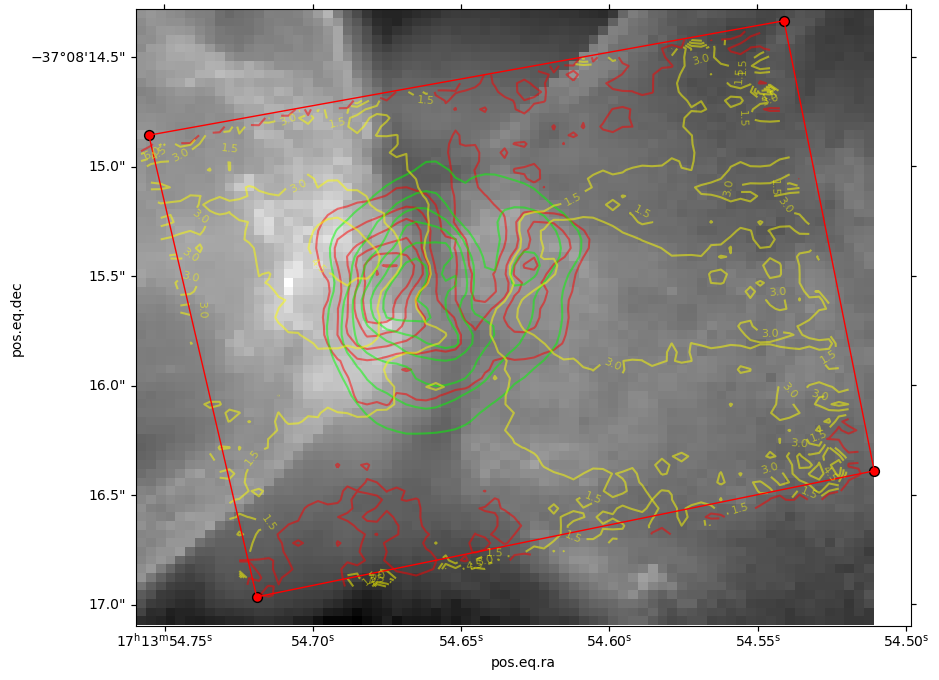

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from mpdaf.obj import Cube
import astropy.units as u
import warnings
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS, FITSFixedWarning
from astropy.io import fits
from reproject import reproject_interp
from astropy.visualization import (MinMaxInterval, LogStretch, ImageNormalize)

# Ignore warnings
warnings.filterwarnings('ignore', category=FITSFixedWarning)
warnings.filterwarnings('ignore', category=UserWarning, message="Warning: converting a masked element to nan.")

# Load the optical image
optical_image_path = '/Users/mary/Downloads/hst_11504_01_wfc3_uvis_f658n_sci.fits'
optical_image_data, optical_image_header = fits.getdata(optical_image_path, header=True)
optical_wcs = WCS(optical_image_header)

# Load the data cube
cube_path = '/Users/mary/Fits image of JWST/ngc6302_ch4-short_s3d.fits'
obj1 = Cube(cube_path)
wcs = WCS(optical_image_header)

# Get the WCS information from the cube
cube_wcs = obj1.wcs.wcs

# Load the saved maps
area_above_continuum_map = np.loadtxt('19area_above_continuum.txt')
area_below_continuum_map = np.loadtxt('19area_below_continuum.txt')
ratio_map = np.loadtxt('19ratio_map.txt')

# Calculate standard deviation for each map, ignoring NaNs
std_above_continuum = np.nanstd(area_above_continuum_map)
std_below_continuum = np.nanstd(area_below_continuum_map)
std_ratio_map = np.nanstd(ratio_map)

print(f"Standard Deviation of Area Above Continuum: {std_above_continuum}")
print(f"Standard Deviation of Area Below Continuum: {std_below_continuum}")
print(f"Standard Deviation of Ratio Map: {std_ratio_map}")

# Define the RA and Dec coordinates of the central star
ra_deg = 258.43579167
dec_deg = -37.10359167
skycoord = SkyCoord(ra=ra_deg*u.degree, dec=dec_deg*u.degree, frame='icrs')

# Reproject the optical image to match the WCS of the data cube
reprojected_image, footprint = reproject_interp((optical_image_data, optical_wcs), cube_wcs, shape_out=obj1.shape[1:])

# Convert RA and Dec to pixel coordinates in the reprojected image
optical_pixel_coords = cube_wcs.world_to_pixel(skycoord)
optical_pixel_x, optical_pixel_y = int(optical_pixel_coords[0]), int(optical_pixel_coords[1])

# Apply a logarithmic scale to the image data
norm = ImageNormalize(reprojected_image, interval=MinMaxInterval(), stretch=LogStretch())

# Plot the reprojected optical image with contours
plt.figure(figsize=(10, 8))
ax = plt.subplot(projection=wcs)
ax.imshow(reprojected_image, cmap='gray', origin='lower', aspect='auto', norm=norm)

# Overlay contours and store the contour objects
contour1 = ax.contour(area_above_continuum_map, colors='red', alpha=0.5, transform=plt.gca().transData)
contour2 = ax.contour(area_below_continuum_map, colors='lime', alpha=0.5, transform=plt.gca().transData)
contour3 = ax.contour(ratio_map, colors='yellow', alpha=0.5, transform=plt.gca().transData)

# Define the specific points to highlight and connect
specific_points = [
    (11.7641, 2.79749),
    (0.795407, 56.0104),
    (65.4217, 69.2025),
    (74.6017, 17.3236)
]

# Convert specific points to pixel coordinates if necessary
# Assuming these points are already in pixel coordinates for simplicity

# Plot the specific points with red circles
for x, y in specific_points:
    ax.scatter(x, y, color='red', s=50, edgecolor='black', marker='o')

# Connect the points to form a box
# Add the first point at the end to close the box
specific_points.append(specific_points[0])
x_coords, y_coords = zip(*specific_points)
ax.plot(x_coords, y_coords, color='red', linestyle='-', linewidth=1)

# Label the green contours
ax.clabel(contour3, inline=True, fontsize=8, fmt='%1.1f')

# Create legend handles
red_patch = plt.Line2D([0], [0], color='red', lw=2, label='Area Above Continuum')
blue_patch = plt.Line2D([0], [0], color='lime', lw=2, label='Area Below Continuum')
green_patch = plt.Line2D([0], [0], color='yellow', lw=2, label='Ratio [%]')

# Save the figure
plt.savefig('modified_optical_image_with_contours_and_box.png', dpi=300, bbox_inches='tight')
plt.show()


Standard Deviation of Area Above Continuum: 0.0013100954151559398
Standard Deviation of Area Below Continuum: 0.05836736226461344
Standard Deviation of Ratio Map: 1.1873583579725095


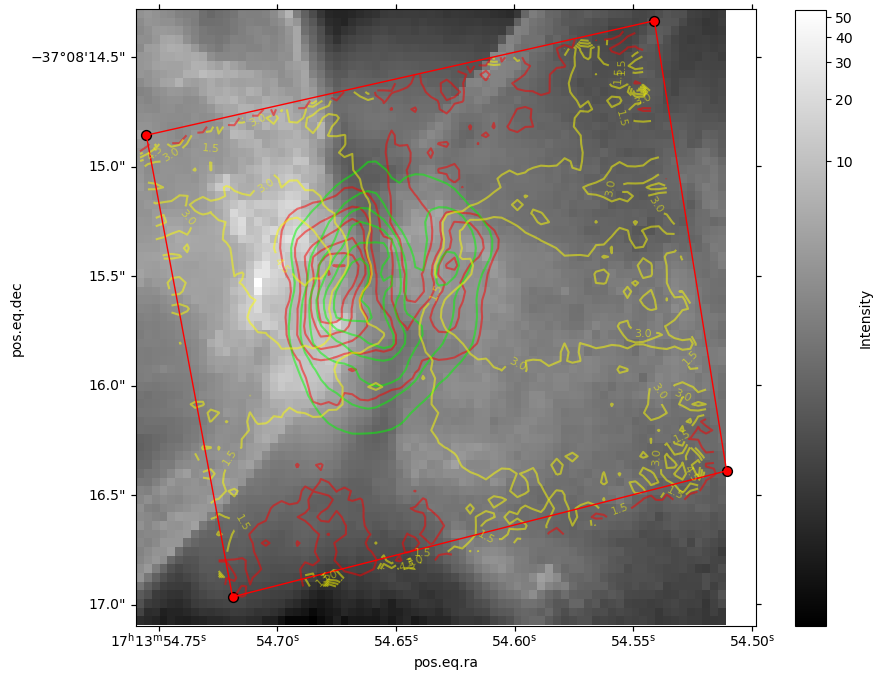

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from mpdaf.obj import Cube
import astropy.units as u
import warnings
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS, FITSFixedWarning
from astropy.io import fits
from reproject import reproject_interp
from astropy.visualization import (MinMaxInterval, LogStretch, ImageNormalize)

# Ignore warnings
warnings.filterwarnings('ignore', category=FITSFixedWarning)
warnings.filterwarnings('ignore', category=UserWarning, message="Warning: converting a masked element to nan.")

# Load the optical image
optical_image_path = '/Users/mary/Downloads/hst_11504_01_wfc3_uvis_f658n_sci.fits'
optical_image_data, optical_image_header = fits.getdata(optical_image_path, header=True)
optical_wcs = WCS(optical_image_header)

# Load the data cube
cube_path = '/Users/mary/Fits image of JWST/ngc6302_ch4-short_s3d.fits'
obj1 = Cube(cube_path)
wcs = WCS(optical_image_header)

# Get the WCS information from the cube
cube_wcs = obj1.wcs.wcs

# Load the saved maps
area_above_continuum_map = np.loadtxt('19area_above_continuum.txt')
area_below_continuum_map = np.loadtxt('19area_below_continuum.txt')
ratio_map = np.loadtxt('19ratio_map.txt')

# Calculate standard deviation for each map, ignoring NaNs
std_above_continuum = np.nanstd(area_above_continuum_map)
std_below_continuum = np.nanstd(area_below_continuum_map)
std_ratio_map = np.nanstd(ratio_map)

print(f"Standard Deviation of Area Above Continuum: {std_above_continuum}")
print(f"Standard Deviation of Area Below Continuum: {std_below_continuum}")
print(f"Standard Deviation of Ratio Map: {std_ratio_map}")

# Define the RA and Dec coordinates of the central star
ra_deg = 258.43579167
dec_deg = -37.10359167
skycoord = SkyCoord(ra=ra_deg*u.degree, dec=dec_deg*u.degree, frame='icrs')

# Reproject the optical image to match the WCS of the data cube
reprojected_image, footprint = reproject_interp((optical_image_data, optical_wcs), cube_wcs, shape_out=obj1.shape[1:])

# Convert RA and Dec to pixel coordinates in the reprojected image
optical_pixel_coords = cube_wcs.world_to_pixel(skycoord)
optical_pixel_x, optical_pixel_y = int(optical_pixel_coords[0]), int(optical_pixel_coords[1])

# Apply a logarithmic scale to the image data
norm = ImageNormalize(reprojected_image, interval=MinMaxInterval(), stretch=LogStretch())

# Plot the reprojected optical image with contours
plt.figure(figsize=(10, 8))
ax = plt.subplot(projection=wcs)
im = ax.imshow(reprojected_image, cmap='gray', origin='lower', aspect='auto', norm=norm)

# Add color bar
plt.colorbar(im, ax=ax, label='Intensity')

# Overlay contours and store the contour objects
contour1 = ax.contour(area_above_continuum_map, colors='red', alpha=0.5, transform=plt.gca().transData)
contour2 = ax.contour(area_below_continuum_map, colors='lime', alpha=0.5, transform=plt.gca().transData)
contour3 = ax.contour(ratio_map, colors='yellow', alpha=0.5, transform=plt.gca().transData)

# Define the specific points to highlight and connect
specific_points = [
    (11.7641, 2.79749),
    (0.795407, 56.0104),
    (65.4217, 69.2025),
    (74.6117, 17.3236)
]

# Plot the specific points with red circles
for x, y in specific_points:
    ax.scatter(x, y, color='red', s=50, edgecolor='black', marker='o')

# Connect the points to form a box
specific_points.append(specific_points[0])
x_coords, y_coords = zip(*specific_points)
ax.plot(x_coords, y_coords, color='red', linestyle='-', linewidth=1)

# Label the green contours
ax.clabel(contour3, inline=True, fontsize=8, fmt='%1.1f')

# Create legend handles
red_patch = plt.Line2D([0], [0], color='red', lw=2, label='Area Above Continuum')
blue_patch = plt.Line2D([0], [0], color='lime', lw=2, label='Area Below Continuum')
green_patch = plt.Line2D([0], [0], color='yellow', lw=2, label='Ratio [%]')

# Save the figure
plt.savefig('modified_optical_image_with_contours_and_box.png', dpi=300, bbox_inches='tight')
plt.show()


Standard Deviation of Area Above Continuum: 0.0013100954151559398
Standard Deviation of Area Below Continuum: 0.05836736226461344
Standard Deviation of Ratio Map: 1.1873583579725095


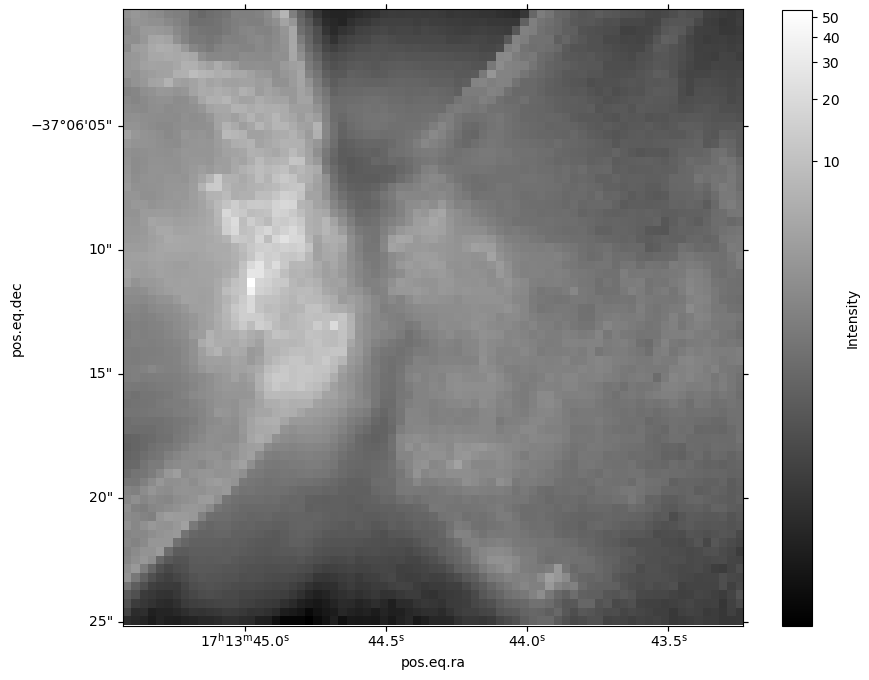

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from mpdaf.obj import Cube
import astropy.units as u
import warnings
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS, FITSFixedWarning
from astropy.io import fits
from reproject import reproject_interp
from astropy.visualization import (MinMaxInterval, LogStretch, ImageNormalize)

# Ignore warnings
warnings.filterwarnings('ignore', category=FITSFixedWarning)
warnings.filterwarnings('ignore', category=UserWarning, message="Warning: converting a masked element to nan.")

# Load the optical image
optical_image_path = '/Users/mary/Downloads/hst_11504_01_wfc3_uvis_f658n_sci.fits'
optical_image_data, optical_image_header = fits.getdata(optical_image_path, header=True)
optical_wcs = WCS(optical_image_header)

# Load the data cube
cube_path = '/Users/mary/Fits image of JWST/ngc6302_ch4-short_s3d.fits'
obj1 = Cube(cube_path)
cube_wcs = obj1.wcs.wcs

# Load the saved maps
area_above_continuum_map = np.loadtxt('19area_above_continuum.txt')
area_below_continuum_map = np.loadtxt('19area_below_continuum.txt')
ratio_map = np.loadtxt('19ratio_map.txt')

# Calculate standard deviation for each map, ignoring NaNs
std_above_continuum = np.nanstd(area_above_continuum_map)
std_below_continuum = np.nanstd(area_below_continuum_map)
std_ratio_map = np.nanstd(ratio_map)

print(f"Standard Deviation of Area Above Continuum: {std_above_continuum}")
print(f"Standard Deviation of Area Below Continuum: {std_below_continuum}")
print(f"Standard Deviation of Ratio Map: {std_ratio_map}")

# Define the RA and Dec coordinates of the central star
ra_deg = 258.43579167
dec_deg = -37.10359167
skycoord = SkyCoord(ra=ra_deg*u.degree, dec=dec_deg*u.degree, frame='icrs')

# Reproject the optical image to match the WCS of the data cube
reprojected_image, footprint = reproject_interp(
    (optical_image_data, optical_wcs), cube_wcs, shape_out=obj1.shape[1:]
)

# Convert RA and Dec to pixel coordinates in the reprojected image
optical_pixel_coords = cube_wcs.world_to_pixel(skycoord)
optical_pixel_x, optical_pixel_y = int(optical_pixel_coords[0]), int(optical_pixel_coords[1])

# Apply a logarithmic scale to the image data
norm = ImageNormalize(reprojected_image, interval=MinMaxInterval(), stretch=LogStretch())

# Plot the reprojected optical image with contours
plt.figure(figsize=(10, 8))
ax = plt.subplot(projection=cube_wcs)
im = ax.imshow(reprojected_image, cmap='gray', origin='lower', aspect='auto', norm=norm)

# Add color bar
plt.colorbar(im, ax=ax, label='Intensity')

# Overlay contours and store the contour objects
contour1 = ax.contour(area_above_continuum_map, colors='red', alpha=0.5, transform=ax.get_transform('world'))
contour2 = ax.contour(area_below_continuum_map, colors='lime', alpha=0.5, transform=ax.get_transform('world'))
contour3 = ax.contour(ratio_map, colors='yellow', alpha=0.5, transform=ax.get_transform('world'))

# Define the specific points to highlight and connect
specific_points = [
    (11.7641, 2.79749),
    (0.795407, 56.0104),
    (65.4217, 69.2025),
    (74.6117, 17.3236)
]

# Plot the specific points with red circles
for x, y in specific_points:
    ax.scatter(x, y, color='red', s=50, edgecolor='black', marker='o', transform=ax.get_transform('world'))

# Connect the points to form a box
specific_points.append(specific_points[0])
x_coords, y_coords = zip(*specific_points)
ax.plot(x_coords, y_coords, color='red', linestyle='-', linewidth=1, transform=ax.get_transform('world'))

# Label the green contours
ax.clabel(contour3, inline=True, fontsize=8, fmt='%1.1f')

# Save the figure
plt.savefig('modified_optical_image_with_contours_and_box.png', dpi=300, bbox_inches='tight')
plt.show()


Standard Deviation of Area Above Continuum: 0.0013100954151559398
Standard Deviation of Area Below Continuum: 0.05836736226461344
Standard Deviation of Ratio Map: 1.1873583579725095


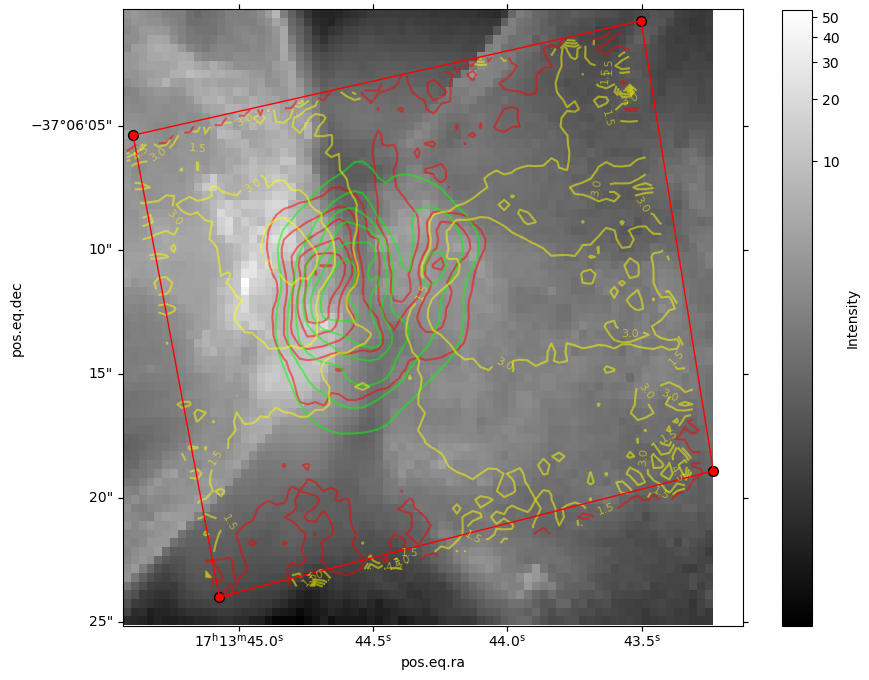

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from mpdaf.obj import Cube
import astropy.units as u
import warnings
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS, FITSFixedWarning
from astropy.io import fits
from reproject import reproject_interp
from astropy.visualization import (MinMaxInterval, LogStretch, ImageNormalize)

# Ignore warnings
warnings.filterwarnings('ignore', category=FITSFixedWarning)
warnings.filterwarnings('ignore', category=UserWarning, message="Warning: converting a masked element to nan.")

# Load the optical image
optical_image_path = '/Users/mary/Downloads/hst_11504_01_wfc3_uvis_f658n_sci.fits'
optical_image_data, optical_image_header = fits.getdata(optical_image_path, header=True)
optical_wcs = WCS(optical_image_header)

# Load the data cube
cube_path = '/Users/mary/Fits image of JWST/ngc6302_ch4-short_s3d.fits'
obj1 = Cube(cube_path)

# Extract WCS from the FITS header of the data cube
cube_header = fits.getheader(cube_path, ext=1)  # Assuming the data is in the first extension
cube_wcs = WCS(cube_header).celestial  # Use only the celestial (spatial) part

# Load the saved maps
area_above_continuum_map = np.loadtxt('19area_above_continuum.txt')
area_below_continuum_map = np.loadtxt('19area_below_continuum.txt')
ratio_map = np.loadtxt('19ratio_map.txt')

# Calculate standard deviation for each map, ignoring NaNs
std_above_continuum = np.nanstd(area_above_continuum_map)
std_below_continuum = np.nanstd(area_below_continuum_map)
std_ratio_map = np.nanstd(ratio_map)

print(f"Standard Deviation of Area Above Continuum: {std_above_continuum}")
print(f"Standard Deviation of Area Below Continuum: {std_below_continuum}")
print(f"Standard Deviation of Ratio Map: {std_ratio_map}")

# Define the RA and Dec coordinates of the central star
ra_deg = 258.43579167
dec_deg = -37.10359167
skycoord = SkyCoord(ra=ra_deg*u.degree, dec=dec_deg*u.degree, frame='icrs')

# Reproject the optical image to match the WCS of the data cube
reprojected_image, footprint = reproject_interp(
    (optical_image_data, optical_wcs), cube_wcs, shape_out=obj1.shape[1:]
)

# Convert RA and Dec to pixel coordinates in the reprojected image
optical_pixel_coords = cube_wcs.world_to_pixel(skycoord)
optical_pixel_x, optical_pixel_y = int(optical_pixel_coords[0]), int(optical_pixel_coords[1])

# Apply a logarithmic scale to the image data
norm = ImageNormalize(reprojected_image, interval=MinMaxInterval(), stretch=LogStretch())

# Plot the reprojected optical image with contours
plt.figure(figsize=(10, 8))
ax = plt.subplot(projection=cube_wcs)
im = ax.imshow(reprojected_image, cmap='gray', origin='lower', aspect='auto', norm=norm)

# Add color bar
plt.colorbar(im, ax=ax, label='Intensity')

# Overlay contours and store the contour objects
contour1 = ax.contour(area_above_continuum_map, colors='red', alpha=0.5, transform=ax.get_transform(cube_wcs))
contour2 = ax.contour(area_below_continuum_map, colors='lime', alpha=0.5, transform=ax.get_transform(cube_wcs))
contour3 = ax.contour(ratio_map, colors='yellow', alpha=0.5, transform=ax.get_transform(cube_wcs))

# Define the specific points to highlight and connect
specific_points = [
    (11.7641, 2.79749),
    (0.795407, 56.0104),
    (65.4217, 69.2025),
    (74.6117, 17.3236)
]

# Plot the specific points with red circles
for x, y in specific_points:
    ax.scatter(x, y, color='red', s=50, edgecolor='black', marker='o', transform=ax.get_transform(cube_wcs))

# Connect the points to form a box
specific_points.append(specific_points[0])
x_coords, y_coords = zip(*specific_points)
ax.plot(x_coords, y_coords, color='red', linestyle='-', linewidth=1, transform=ax.get_transform(cube_wcs))

# Label the green contours
ax.clabel(contour3, inline=True, fontsize=8, fmt='%1.1f')

# Save the figure
plt.savefig('modified_optical_image_with_contours_and_box.png', dpi=300, bbox_inches='tight')
plt.show()


Standard Deviation of Area Above Continuum: 0.0013100954151559398
Standard Deviation of Area Below Continuum: 0.05836736226461344
Standard Deviation of Ratio Map: 1.1873583579725095


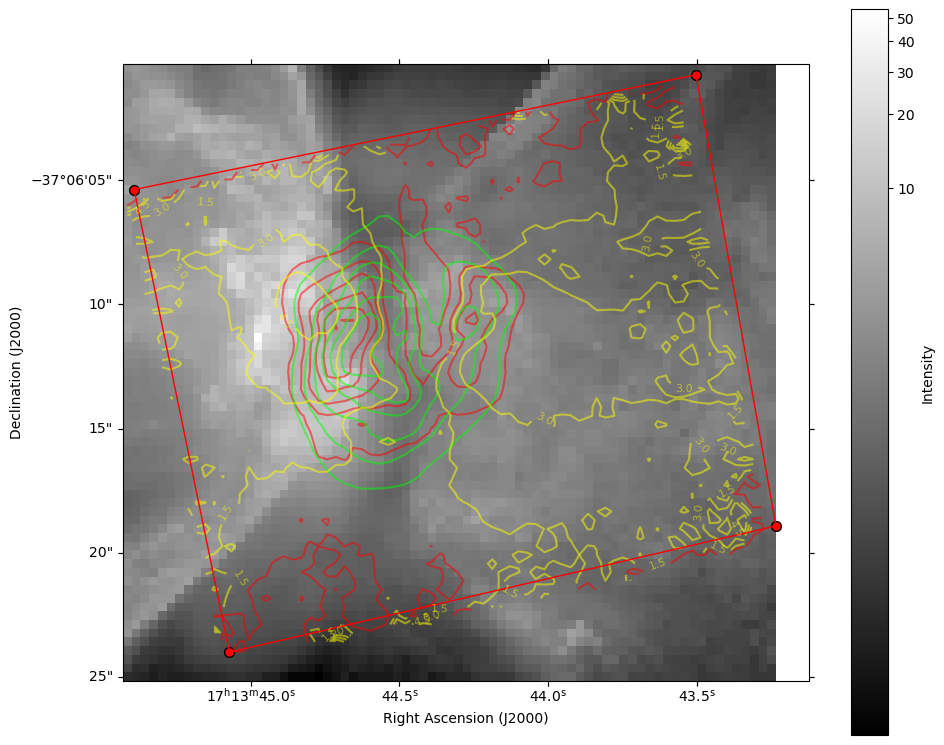

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from mpdaf.obj import Cube
import astropy.units as u
import warnings
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS, FITSFixedWarning
from astropy.io import fits
from reproject import reproject_interp
from astropy.visualization import (MinMaxInterval, LogStretch, ImageNormalize)

# Ignore warnings
warnings.filterwarnings('ignore', category=FITSFixedWarning)
warnings.filterwarnings('ignore', category=UserWarning, message="Warning: converting a masked element to nan.")

# Load the optical image
optical_image_path = '/Users/mary/Downloads/hst_11504_01_wfc3_uvis_f658n_sci.fits'
optical_image_data, optical_image_header = fits.getdata(optical_image_path, header=True)
optical_wcs = WCS(optical_image_header)

# Load the data cube
cube_path = '/Users/mary/Fits image of JWST/ngc6302_ch4-short_s3d.fits'
obj1 = Cube(cube_path)

# Extract WCS from the FITS header of the data cube
cube_header = fits.getheader(cube_path, ext=1)  # Assuming the data is in the first extension
cube_wcs = WCS(cube_header).celestial  # Use only the celestial (spatial) part

# Load the saved maps
area_above_continuum_map = np.loadtxt('19area_above_continuum.txt')
area_below_continuum_map = np.loadtxt('19area_below_continuum.txt')
ratio_map = np.loadtxt('19ratio_map.txt')

# Calculate standard deviation for each map, ignoring NaNs
std_above_continuum = np.nanstd(area_above_continuum_map)
std_below_continuum = np.nanstd(area_below_continuum_map)
std_ratio_map = np.nanstd(ratio_map)

print(f"Standard Deviation of Area Above Continuum: {std_above_continuum}")
print(f"Standard Deviation of Area Below Continuum: {std_below_continuum}")
print(f"Standard Deviation of Ratio Map: {std_ratio_map}")

# Define the RA and Dec coordinates of the central star
ra_deg = 258.43579167
dec_deg = -37.10359167
skycoord = SkyCoord(ra=ra_deg*u.degree, dec=dec_deg*u.degree, frame='icrs')

# Reproject the optical image to match the WCS of the data cube
reprojected_image, footprint = reproject_interp(
    (optical_image_data, optical_wcs), cube_wcs, shape_out=obj1.shape[1:]
)

# Convert RA and Dec to pixel coordinates in the reprojected image
optical_pixel_coords = cube_wcs.world_to_pixel(skycoord)
optical_pixel_x, optical_pixel_y = int(optical_pixel_coords[0]), int(optical_pixel_coords[1])

# Apply a logarithmic scale to the image data
norm = ImageNormalize(reprojected_image, interval=MinMaxInterval(), stretch=LogStretch())

# Plot the reprojected optical image with contours
plt.figure(figsize=(10, 8))
ax = plt.subplot(projection=cube_wcs)
im = ax.imshow(reprojected_image, cmap='gray', origin='lower', aspect='equal', norm=norm)

# Add color bar
plt.colorbar(im, ax=ax, label='Intensity')

# Overlay contours and store the contour objects
contour1 = ax.contour(area_above_continuum_map, colors='red', alpha=0.5, transform=ax.get_transform(cube_wcs))
contour2 = ax.contour(area_below_continuum_map, colors='lime', alpha=0.5, transform=ax.get_transform(cube_wcs))
contour3 = ax.contour(ratio_map, colors='yellow', alpha=0.5, transform=ax.get_transform(cube_wcs))

# Define the specific points to highlight and connect
specific_points = [
    (11.7641, 2.79749),
    (0.795407, 56.0104),
    (65.4217, 69.2025),
    (74.6117, 17.3236)
]

# Plot the specific points with red circles
for x, y in specific_points:
    ax.scatter(x, y, color='red', s=50, edgecolor='black', marker='o', transform=ax.get_transform(cube_wcs))

# Connect the points to form a box
specific_points.append(specific_points[0])
x_coords, y_coords = zip(*specific_points)
ax.plot(x_coords, y_coords, color='red', linestyle='-', linewidth=1, transform=ax.get_transform(cube_wcs))

# Label the green contours
ax.clabel(contour3, inline=True, fontsize=8, fmt='%1.1f')

# Set axis labels
ax.set_xlabel('Right Ascension (J2000)')
ax.set_ylabel('Declination (J2000)')

# Use tight layout to adjust subplot parameters
plt.tight_layout()

# Save the figure
plt.savefig('modified_optical_image_with_contours_and_box.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()


Standard Deviation of Area Above Continuum: 0.0013100954151559398
Standard Deviation of Area Below Continuum: 0.05836736226461344
Standard Deviation of Ratio Map: 1.1873583579725095
Reprojected Image range: 0.153784679110872 54.18135374098915


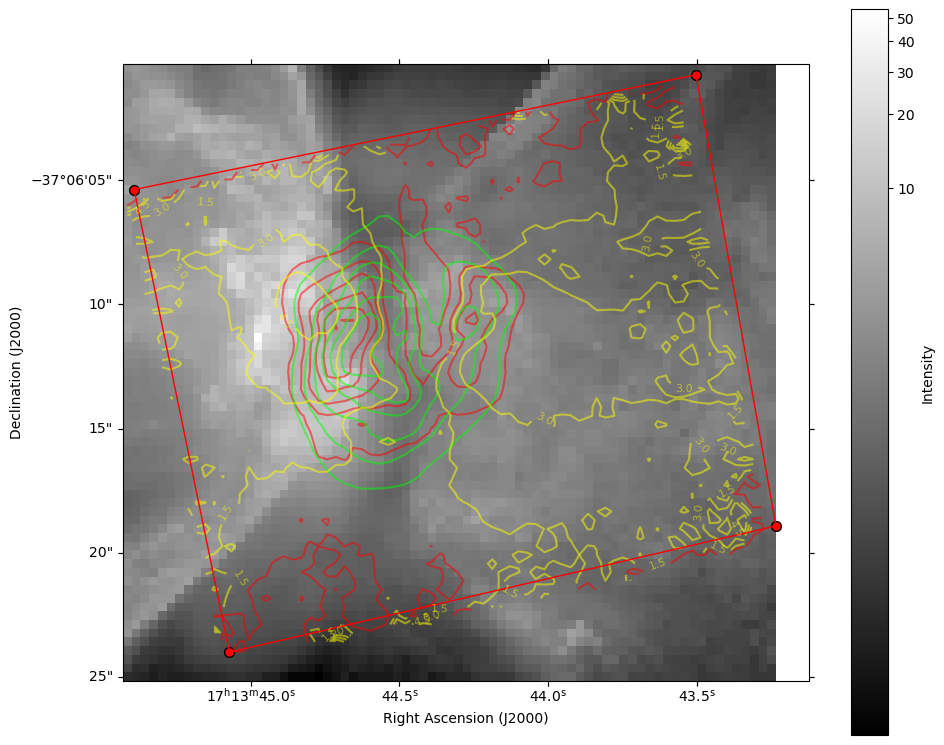

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from mpdaf.obj import Cube
import astropy.units as u
import warnings
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS, FITSFixedWarning
from astropy.io import fits
from reproject import reproject_interp
from astropy.visualization import (MinMaxInterval, LogStretch, ImageNormalize)

# Ignore warnings
warnings.filterwarnings('ignore', category=FITSFixedWarning)
warnings.filterwarnings('ignore', category=UserWarning, message="Warning: converting a masked element to nan.")

# Load the optical image
optical_image_path = '/Users/mary/Downloads/hst_11504_01_wfc3_uvis_f658n_sci.fits'
optical_image_data, optical_image_header = fits.getdata(optical_image_path, header=True)
optical_wcs = WCS(optical_image_header)

# Load the data cube
cube_path = '/Users/mary/Fits image of JWST/ngc6302_ch4-short_s3d.fits'
obj1 = Cube(cube_path)

# Extract WCS from the FITS header of the data cube
cube_header = fits.getheader(cube_path, ext=1)  # Assuming the data is in the first extension
cube_wcs = WCS(cube_header).celestial  # Use only the celestial (spatial) part

# Load the saved maps
area_above_continuum_map = np.loadtxt('19area_above_continuum.txt')
area_below_continuum_map = np.loadtxt('19area_below_continuum.txt')
ratio_map = np.loadtxt('19ratio_map.txt')

# Calculate standard deviation for each map, ignoring NaNs
std_above_continuum = np.nanstd(area_above_continuum_map)
std_below_continuum = np.nanstd(area_below_continuum_map)
std_ratio_map = np.nanstd(ratio_map)

print(f"Standard Deviation of Area Above Continuum: {std_above_continuum}")
print(f"Standard Deviation of Area Below Continuum: {std_below_continuum}")
print(f"Standard Deviation of Ratio Map: {std_ratio_map}")

# Define the RA and Dec coordinates of the central star
ra_deg = 258.43579167
dec_deg = -37.10359167
skycoord = SkyCoord(ra=ra_deg*u.degree, dec=dec_deg*u.degree, frame='icrs')

# Reproject the optical image to match the WCS of the data cube
reprojected_image, footprint = reproject_interp(
    (optical_image_data, optical_wcs), cube_wcs, shape_out=obj1.shape[1:]
)

# Check if the reprojected image is loaded correctly
if reprojected_image is None or reprojected_image.size == 0:
    raise ValueError("Reprojected image not loaded correctly.")

# Print data range for debugging
print("Reprojected Image range:", reprojected_image.min(), reprojected_image.max())

# Convert RA and Dec to pixel coordinates in the reprojected image
optical_pixel_coords = cube_wcs.world_to_pixel(skycoord)
optical_pixel_x, optical_pixel_y = int(optical_pixel_coords[0]), int(optical_pixel_coords[1])

# Apply a logarithmic scale to the image data
norm = ImageNormalize(reprojected_image, interval=MinMaxInterval(), stretch=LogStretch())

# Plot the reprojected optical image with contours
plt.figure(figsize=(10, 8))
ax = plt.subplot(projection=cube_wcs)
im = ax.imshow(reprojected_image, cmap='gray', origin='lower', aspect='equal', norm=norm)

# Add color bar
plt.colorbar(im, ax=ax, label='Intensity')

# Overlay contours and store the contour objects
contour1 = ax.contour(area_above_continuum_map, colors='red', alpha=0.5, transform=ax.get_transform(cube_wcs))
contour2 = ax.contour(area_below_continuum_map, colors='lime', alpha=0.5, transform=ax.get_transform(cube_wcs))
contour3 = ax.contour(ratio_map, colors='yellow', alpha=0.5, transform=ax.get_transform(cube_wcs))

# Define the specific points to highlight and connect
specific_points = [
    (11.7641, 2.79749),
    (0.795407, 56.0104),
    (65.4217, 69.2025),
    (74.6117, 17.3236)
]

# Plot the specific points with red circles
for x, y in specific_points:
    ax.scatter(x, y, color='red', s=50, edgecolor='black', marker='o', transform=ax.get_transform(cube_wcs))

# Connect the points to form a box
specific_points.append(specific_points[0])
x_coords, y_coords = zip(*specific_points)
ax.plot(x_coords, y_coords, color='red', linestyle='-', linewidth=1, transform=ax.get_transform(cube_wcs))

# Label the green contours
ax.clabel(contour3, inline=True, fontsize=8, fmt='%1.1f')

# Set axis labels
ax.set_xlabel('Right Ascension (J2000)')
ax.set_ylabel('Declination (J2000)')

# Use tight layout to adjust subplot parameters
plt.tight_layout()

# Save the figure
plt.savefig('modified_optical_image_with_contours_and_box.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()


Standard Deviation of Area Above Continuum: 0.0013100954151559398
Standard Deviation of Area Below Continuum: 0.05836736226461344
Standard Deviation of Ratio Map: 1.1873583579725095
Reprojected Image range: 0.153784679110872 54.18135374098915


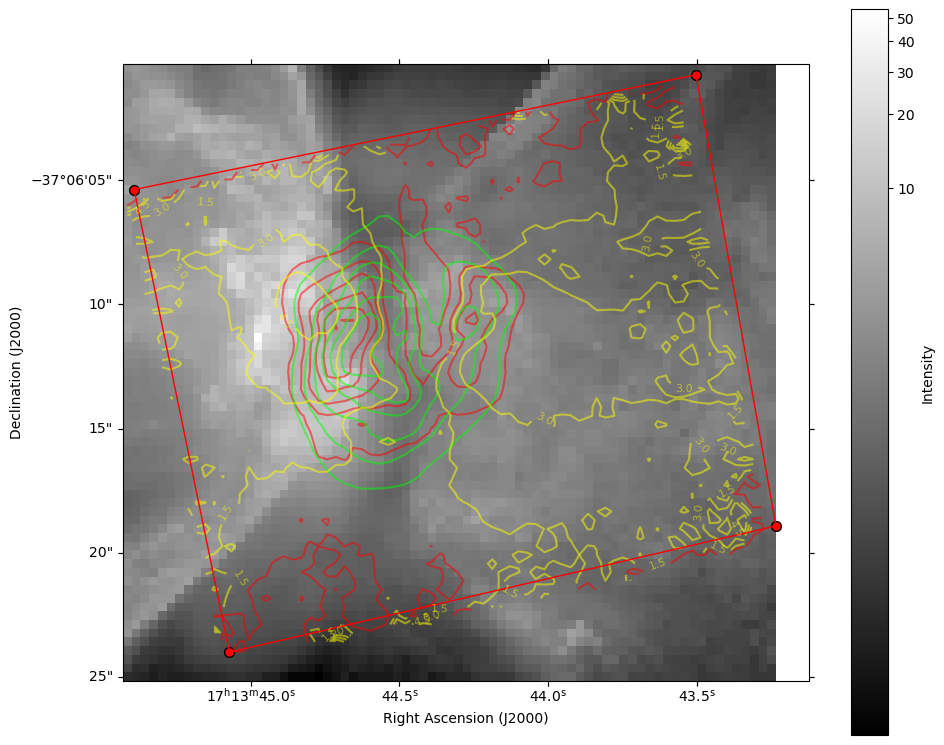

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from mpdaf.obj import Cube
import astropy.units as u
import warnings
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS, FITSFixedWarning
from astropy.io import fits
from reproject import reproject_interp
from astropy.visualization import (MinMaxInterval, LogStretch, ImageNormalize)

# Ignore warnings
warnings.filterwarnings('ignore', category=FITSFixedWarning)
warnings.filterwarnings('ignore', category=UserWarning, message="Warning: converting a masked element to nan.")

# Load the optical image
optical_image_path = '/Users/mary/Downloads/hst_11504_01_wfc3_uvis_f658n_sci.fits'
optical_image_data, optical_image_header = fits.getdata(optical_image_path, header=True)
optical_wcs = WCS(optical_image_header)

# Load the data cube
cube_path = '/Users/mary/Fits image of JWST/ngc6302_ch4-short_s3d.fits'
obj1 = Cube(cube_path)

# Extract WCS from the FITS header of the data cube
cube_header = fits.getheader(cube_path, ext=1)  # Assuming the data is in the first extension
cube_wcs = WCS(cube_header).celestial  # Use only the celestial (spatial) part

# Load the saved maps
area_above_continuum_map = np.loadtxt('19area_above_continuum.txt')
area_below_continuum_map = np.loadtxt('19area_below_continuum.txt')
ratio_map = np.loadtxt('19ratio_map.txt')

# Calculate standard deviation for each map, ignoring NaNs
std_above_continuum = np.nanstd(area_above_continuum_map)
std_below_continuum = np.nanstd(area_below_continuum_map)
std_ratio_map = np.nanstd(ratio_map)

print(f"Standard Deviation of Area Above Continuum: {std_above_continuum}")
print(f"Standard Deviation of Area Below Continuum: {std_below_continuum}")
print(f"Standard Deviation of Ratio Map: {std_ratio_map}")

# Define the RA and Dec coordinates of the central star
ra_deg = 258.43579167
dec_deg = -37.10359167
skycoord = SkyCoord(ra=ra_deg*u.degree, dec=dec_deg*u.degree, frame='icrs')

# Reproject the optical image to match the WCS of the data cube
reprojected_image, footprint = reproject_interp(
    (optical_image_data, optical_wcs), cube_wcs, shape_out=obj1.shape[1:]
)

# Check if the reprojected image is loaded correctly
if reprojected_image is None or reprojected_image.size == 0:
    raise ValueError("Reprojected image not loaded correctly.")

# Print data range for debugging
print("Reprojected Image range:", reprojected_image.min(), reprojected_image.max())

# Convert RA and Dec to pixel coordinates in the reprojected image
optical_pixel_coords = cube_wcs.world_to_pixel(skycoord)
optical_pixel_x, optical_pixel_y = int(optical_pixel_coords[0]), int(optical_pixel_coords[1])

# Apply a logarithmic scale to the image data
norm = ImageNormalize(reprojected_image, interval=MinMaxInterval(), stretch=LogStretch())

# Plot the reprojected optical image with contours
plt.figure(figsize=(10, 8))
ax = plt.subplot(projection=cube_wcs)
im = ax.imshow(reprojected_image, cmap='gray', origin='lower', aspect='equal', norm=norm)

# Add color bar
plt.colorbar(im, ax=ax, label='Intensity')

# Overlay contours and store the contour objects
contour1 = ax.contour(area_above_continuum_map, colors='red', alpha=0.5, transform=ax.get_transform(cube_wcs))
contour2 = ax.contour(area_below_continuum_map, colors='lime', alpha=0.5, transform=ax.get_transform(cube_wcs))
contour3 = ax.contour(ratio_map, colors='yellow', alpha=0.5, transform=ax.get_transform(cube_wcs))

# Define the specific points to highlight and connect
specific_points = [
    (11.7641, 2.79749),
    (0.795407, 56.0104),
    (65.4217, 69.2025),
    (74.6117, 17.3236)
]

# Plot the specific points with red circles
for x, y in specific_points:
    ax.scatter(x, y, color='red', s=50, edgecolor='black', marker='o', transform=ax.get_transform(cube_wcs))

# Connect the points to form a box
specific_points.append(specific_points[0])
x_coords, y_coords = zip(*specific_points)
ax.plot(x_coords, y_coords, color='red', linestyle='-', linewidth=1, transform=ax.get_transform(cube_wcs))

# Label the green contours
ax.clabel(contour3, inline=True, fontsize=8, fmt='%1.1f')

# Set axis labels
ax.set_xlabel('Right Ascension (J2000)')
ax.set_ylabel('Declination (J2000)')

# Set plot limits if necessary
ax.set_xlim(ax.get_xlim())  # Adjust as needed
ax.set_ylim(ax.get_ylim())  # Adjust as needed

# Use tight layout to adjust subplot parameters
plt.tight_layout()

# Save the figure
plt.savefig('modified_optical_image_with_contours_and_box.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()


Standard Deviation of Area Above Continuum: 0.0013100954151559398
Standard Deviation of Area Below Continuum: 0.05836736226461344
Standard Deviation of Ratio Map: 1.1873583579725095
Reprojected Image range: 0.153784679110872 54.18135374098915


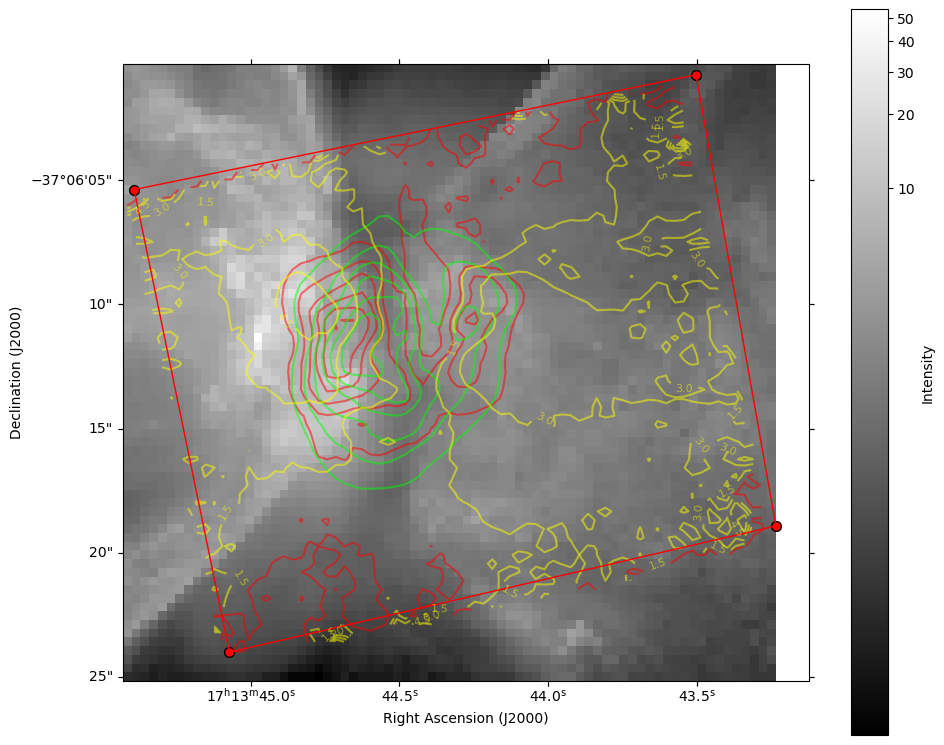

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from mpdaf.obj import Cube
import astropy.units as u
import warnings
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS, FITSFixedWarning
from astropy.io import fits
from reproject import reproject_interp
from astropy.visualization import (MinMaxInterval, LogStretch, ImageNormalize)

# Ignore warnings
warnings.filterwarnings('ignore', category=FITSFixedWarning)
warnings.filterwarnings('ignore', category=UserWarning, message="Warning: converting a masked element to nan.")

# Load the optical image
optical_image_path = '/Users/mary/Downloads/hst_11504_01_wfc3_uvis_f658n_sci.fits'
optical_image_data, optical_image_header = fits.getdata(optical_image_path, header=True)
optical_wcs = WCS(optical_image_header)

# Load the data cube
cube_path = '/Users/mary/Fits image of JWST/ngc6302_ch4-short_s3d.fits'
obj1 = Cube(cube_path)

# Extract WCS from the FITS header of the data cube
cube_header = fits.getheader(cube_path, ext=1)  # Assuming the data is in the first extension
cube_wcs = WCS(cube_header).celestial  # Use only the celestial (spatial) part

# Load the saved maps
area_above_continuum_map = np.loadtxt('19area_above_continuum.txt')
area_below_continuum_map = np.loadtxt('19area_below_continuum.txt')
ratio_map = np.loadtxt('19ratio_map.txt')

# Calculate standard deviation for each map, ignoring NaNs
std_above_continuum = np.nanstd(area_above_continuum_map)
std_below_continuum = np.nanstd(area_below_continuum_map)
std_ratio_map = np.nanstd(ratio_map)

print(f"Standard Deviation of Area Above Continuum: {std_above_continuum}")
print(f"Standard Deviation of Area Below Continuum: {std_below_continuum}")
print(f"Standard Deviation of Ratio Map: {std_ratio_map}")

# Define the RA and Dec coordinates of the central star
ra_deg = 258.43579167
dec_deg = -37.10359167
skycoord = SkyCoord(ra=ra_deg*u.degree, dec=dec_deg*u.degree, frame='icrs')

# Reproject the optical image to match the WCS of the data cube
reprojected_image, footprint = reproject_interp(
    (optical_image_data, optical_wcs), cube_wcs, shape_out=obj1.shape[1:]
)

# Check if the reprojected image is loaded correctly
if reprojected_image is None or reprojected_image.size == 0:
    raise ValueError("Reprojected image not loaded correctly.")

# Print data range for debugging
print("Reprojected Image range:", reprojected_image.min(), reprojected_image.max())

# Convert RA and Dec to pixel coordinates in the reprojected image
optical_pixel_coords = cube_wcs.world_to_pixel(skycoord)
optical_pixel_x, optical_pixel_y = int(optical_pixel_coords[0]), int(optical_pixel_coords[1])

# Apply a logarithmic scale to the image data
norm = ImageNormalize(reprojected_image, interval=MinMaxInterval(), stretch=LogStretch())

# Plot the reprojected optical image with contours
plt.figure(figsize=(10, 8))
ax = plt.subplot(projection=cube_wcs)
im = ax.imshow(reprojected_image, cmap='gray', origin='lower', aspect='equal', norm=norm)

# Add color bar
plt.colorbar(im, ax=ax, label='Intensity')

# Overlay contours and store the contour objects
contour1 = ax.contour(area_above_continuum_map, colors='red', alpha=0.5, transform=ax.get_transform(cube_wcs))
contour2 = ax.contour(area_below_continuum_map, colors='lime', alpha=0.5, transform=ax.get_transform(cube_wcs))
contour3 = ax.contour(ratio_map, colors='yellow', alpha=0.5, transform=ax.get_transform(cube_wcs))

# Define the specific points to highlight and connect
specific_points = [
    (11.7641, 2.79749),
    (0.795407, 56.0104),
    (65.4217, 69.2025),
    (74.6117, 17.3236)
]

# Plot the specific points with red circles
for x, y in specific_points:
    ax.scatter(x, y, color='red', s=50, edgecolor='black', marker='o', transform=ax.get_transform(cube_wcs))

# Connect the points to form a box
specific_points.append(specific_points[0])
x_coords, y_coords = zip(*specific_points)
ax.plot(x_coords, y_coords, color='red', linestyle='-', linewidth=1, transform=ax.get_transform(cube_wcs))

# Label the green contours
ax.clabel(contour3, inline=True, fontsize=8, fmt='%1.1f')

# Set axis labels
ax.set_xlabel('Right Ascension (J2000)')
ax.set_ylabel('Declination (J2000)')

# Adjust tick label positions
ax.coords['ra'].set_ticklabel_position('b')
ax.coords['dec'].set_ticklabel_position('l')

# Use tight layout to adjust subplot parameters
plt.tight_layout()

# Save the figure
plt.savefig('modified_optical_image_with_contours_and_box.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()


Standard Deviation of Area Above Continuum: 0.0013100954151559398
Standard Deviation of Area Below Continuum: 0.05836736226461344
Standard Deviation of Ratio Map: 1.1873583579725095
Reprojected Image range: 0.153784679110872 54.18135374098915


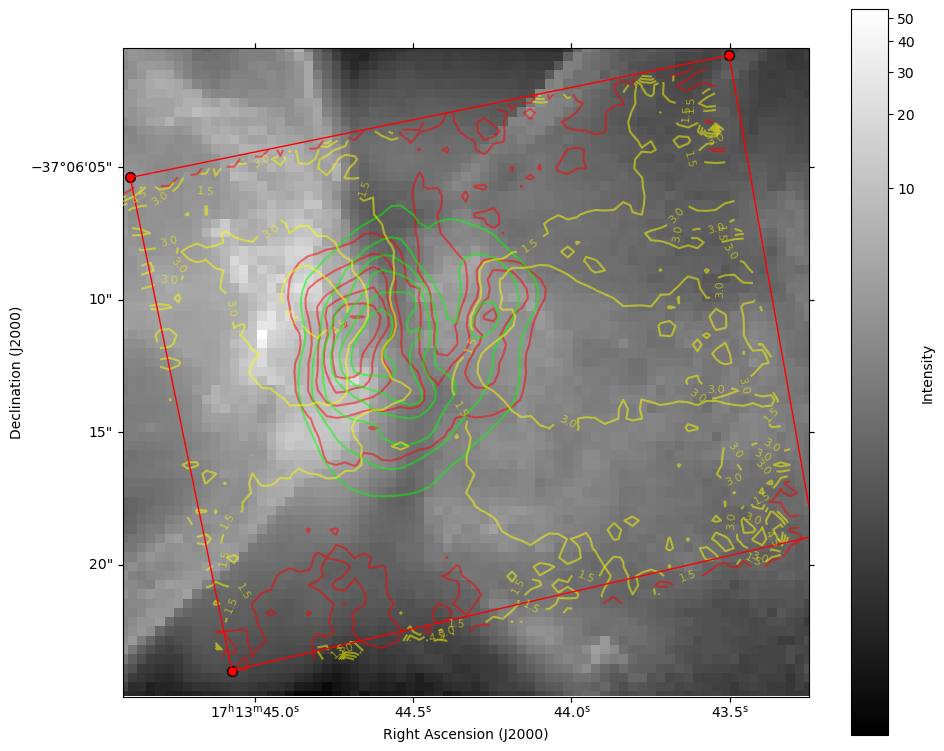

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from mpdaf.obj import Cube
import astropy.units as u
import warnings
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS, FITSFixedWarning
from astropy.io import fits
from reproject import reproject_interp
from astropy.visualization import (MinMaxInterval, LogStretch, ImageNormalize)

# Ignore warnings
warnings.filterwarnings('ignore', category=FITSFixedWarning)
warnings.filterwarnings('ignore', category=UserWarning, message="Warning: converting a masked element to nan.")

# Load the optical image
optical_image_path = '/Users/mary/Downloads/hst_11504_01_wfc3_uvis_f658n_sci.fits'
optical_image_data, optical_image_header = fits.getdata(optical_image_path, header=True)
optical_wcs = WCS(optical_image_header)

# Load the data cube
cube_path = '/Users/mary/Fits image of JWST/ngc6302_ch4-short_s3d.fits'
obj1 = Cube(cube_path)

# Extract WCS from the FITS header of the data cube
cube_header = fits.getheader(cube_path, ext=1)  # Verify the correct extension
cube_wcs = WCS(cube_header).celestial  # Use only the celestial (spatial) part

# Load the saved maps
area_above_continuum_map = np.loadtxt('19area_above_continuum.txt')
area_below_continuum_map = np.loadtxt('19area_below_continuum.txt')
ratio_map = np.loadtxt('19ratio_map.txt')

# Calculate standard deviation for each map, ignoring NaNs
std_above_continuum = np.nanstd(area_above_continuum_map)
std_below_continuum = np.nanstd(area_below_continuum_map)
std_ratio_map = np.nanstd(ratio_map)

print(f"Standard Deviation of Area Above Continuum: {std_above_continuum}")
print(f"Standard Deviation of Area Below Continuum: {std_below_continuum}")
print(f"Standard Deviation of Ratio Map: {std_ratio_map}")

# Define the RA and Dec coordinates of the central star
ra_deg = 258.43579167
dec_deg = -37.10359167
skycoord = SkyCoord(ra=ra_deg*u.degree, dec=dec_deg*u.degree, frame='icrs')

# Reproject the optical image to match the WCS of the data cube
reprojected_image, footprint = reproject_interp(
    (optical_image_data, optical_wcs), cube_wcs, shape_out=obj1.shape[1:]
)

# Check if the reprojected image is loaded correctly
if reprojected_image is None or reprojected_image.size == 0:
    raise ValueError("Reprojected image not loaded correctly.")

# Print data range for debugging
print("Reprojected Image range:", reprojected_image.min(), reprojected_image.max())

# Convert RA and Dec to pixel coordinates in the reprojected image
optical_pixel_coords = cube_wcs.world_to_pixel(skycoord)
optical_pixel_x, optical_pixel_y = int(optical_pixel_coords[0]), int(optical_pixel_coords[1])

# Apply a logarithmic scale to the image data
norm = ImageNormalize(reprojected_image, interval=MinMaxInterval(), stretch=LogStretch())

# Plot the reprojected optical image with contours
plt.figure(figsize=(10, 8))
ax = plt.subplot(projection=cube_wcs)

# Set plot limits to avoid cutting off the image and prevent white areas
ax.set_xlim(0,74)  # Adjust these limits based on your data range
ax.set_ylim(0, 70)  # Adjust these limits based on your data range

# Display the reprojected image
im = ax.imshow(reprojected_image, cmap='gray', origin='lower', aspect='equal', norm=norm)

# Add color bar
plt.colorbar(im, ax=ax, label='Intensity')

# Overlay contours
contour1 = ax.contour(area_above_continuum_map, colors='red', alpha=0.5, transform=ax.get_transform(cube_wcs))
contour2 = ax.contour(area_below_continuum_map, colors='lime', alpha=0.5, transform=ax.get_transform(cube_wcs))
contour3 = ax.contour(ratio_map, colors='yellow', alpha=0.5, transform=ax.get_transform(cube_wcs))
 #Label the green contours
plt.clabel(contour3, inline=True, fontsize=8, fmt='%1.1f')

# Filter the ratio map to only include values >= 1.8
filtered_ratio_map = np.where(ratio_map >= 2, ratio_map, np.nan)
# Define and plot specific points
specific_points = [
    (11.7641, 2.79749),
    (0.795407, 56.0104),
    (65.4217, 69.2025),
    (74.6117, 17.3236)
]
for x, y in specific_points:
    ax.scatter(x, y, color='red', s=50, edgecolor='black', marker='o', transform=ax.get_transform(cube_wcs))

# Connect the points to form a box
specific_points.append(specific_points[0])
x_coords, y_coords = zip(*specific_points)
ax.plot(x_coords, y_coords, color='red', linestyle='-', linewidth=1, transform=ax.get_transform(cube_wcs))

# Label the green contours
ax.clabel(contour3, inline=True, fontsize=8, fmt='%1.1f')

# Set axis labels
ax.set_xlabel('Right Ascension (J2000)')
ax.set_ylabel('Declination (J2000)')

# Adjust tick label positions
ax.coords['ra'].set_ticklabel_position('b')
ax.coords['dec'].set_ticklabel_position('l')

# Use tight layout to adjust subplot parameters
plt.tight_layout()

# Save the figure
plt.savefig('modified_optical_image_with_contours_and_box_fixed.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()


Standard Deviation of area_above_continuum_map: 0.0013100954151559398
Standard Deviation of Ratio Map: 1.1873583579725095
Non-zero values in filtered_area_above_continuum_map: 475
Min/Max of filtered_area_above_continuum_map: 0.001325, 0.00902


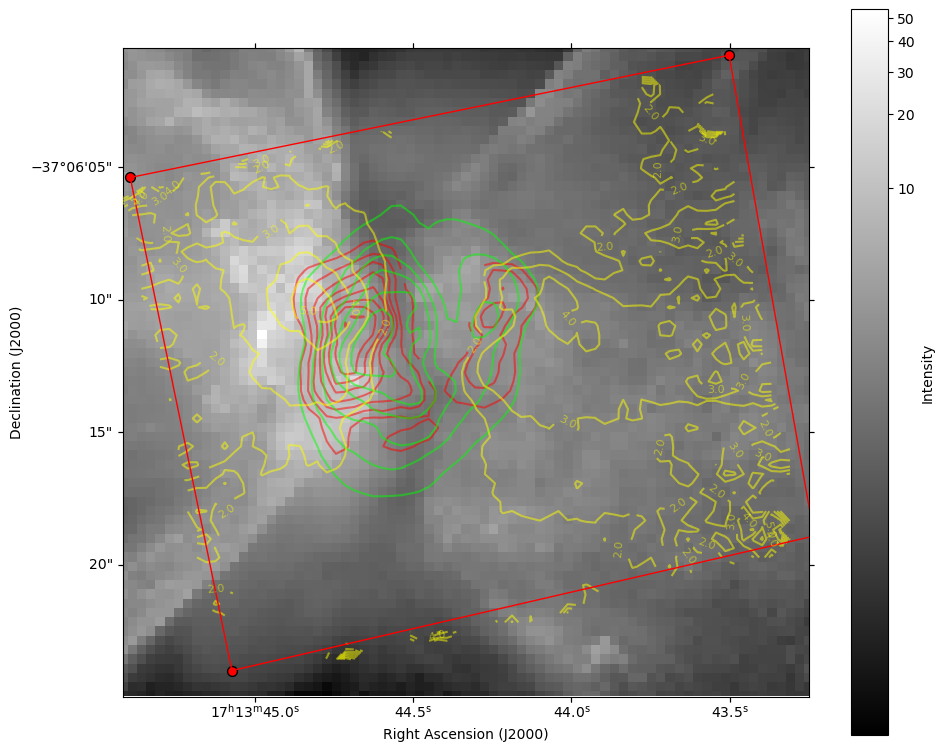

In [100]:
import numpy as np
import matplotlib.pyplot as plt
from mpdaf.obj import Cube
import astropy.units as u
import warnings
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS, FITSFixedWarning
from astropy.io import fits
from reproject import reproject_interp
from astropy.visualization import (MinMaxInterval, LogStretch, ImageNormalize)

# Ignore warnings
warnings.filterwarnings('ignore', category=FITSFixedWarning)
warnings.filterwarnings('ignore', category=UserWarning, message="Warning: converting a masked element to nan.")

# Load the optical image
optical_image_path = '/Users/mary/Downloads/hst_11504_01_wfc3_uvis_f658n_sci.fits'
optical_image_data, optical_image_header = fits.getdata(optical_image_path, header=True)
optical_wcs = WCS(optical_image_header)

# Load the data cube
cube_path = '/Users/mary/Fits image of JWST/ngc6302_ch4-short_s3d.fits'
obj1 = Cube(cube_path)

# Extract WCS from the FITS header of the data cube
cube_header = fits.getheader(cube_path, ext=1)  # Verify the correct extension
cube_wcs = WCS(cube_header).celestial  # Use only the celestial (spatial) part

# Load the saved maps
area_above_continuum_map = np.loadtxt('19area_above_continuum.txt')
area_below_continuum_map = np.loadtxt('19area_below_continuum.txt')
ratio_map = np.loadtxt('19ratio_map.txt')
# Calculate standard deviation for the area_above_continuum_map, ignoring NaNs
std_area_above_continuum_map = np.nanstd(area_above_continuum_map)
print(f"Standard Deviation of area_above_continuum_map: {std_area_above_continuum_map}")


# Calculate standard deviation for the ratio map, ignoring NaNs
std_ratio_map = np.nanstd(ratio_map)
print(f"Standard Deviation of Ratio Map: {std_ratio_map}")

# Define the RA and Dec coordinates of the central star
ra_deg = 258.43579167
dec_deg = -37.10359167
skycoord = SkyCoord(ra=ra_deg*u.degree, dec=dec_deg*u.degree, frame='icrs')

# Reproject the optical image to match the WCS of the data cube
reprojected_image, footprint = reproject_interp(
    (optical_image_data, optical_wcs), cube_wcs, shape_out=obj1.shape[1:]
)

# Check if the reprojected image is loaded correctly
if reprojected_image is None or reprojected_image.size == 0:
    raise ValueError("Reprojected image not loaded correctly.")

# Convert RA and Dec to pixel coordinates in the reprojected image
optical_pixel_coords = cube_wcs.world_to_pixel(skycoord)
optical_pixel_x, optical_pixel_y = int(optical_pixel_coords[0]), int(optical_pixel_coords[1])

# Apply a logarithmic scale to the image data
norm = ImageNormalize(reprojected_image, interval=MinMaxInterval(), stretch=LogStretch())

# Plot the reprojected optical image with contours
plt.figure(figsize=(10, 8))
ax = plt.subplot(projection=cube_wcs)

# Set plot limits to avoid cutting off the image and prevent white areas
ax.set_xlim(0, 74)  # Adjust these limits based on your data range
ax.set_ylim(0, 70)  # Adjust these limits based on your data range

# Display the reprojected image
im = ax.imshow(reprojected_image, cmap='gray', origin='lower', aspect='equal', norm=norm)

# Add color bar
plt.colorbar(im, ax=ax, label='Intensity')


# Filter the ratio map to only include values > std_ratio_map
filtered_ratio_map = np.where(ratio_map > std_ratio_map, ratio_map, np.nan)
filtered_area_above_continuum_map = np.where(area_above_continuum_map > std_area_above_continuum_map, area_above_continuum_map, np.nan)
# Overlay contours for the filtered ratio map
contour1 = ax.contour(filtered_area_above_continuum_map, colors='red', alpha=0.5, transform=ax.get_transform(cube_wcs))
contour2 = ax.contour(area_below_continuum_map, colors='lime', alpha=0.5, transform=ax.get_transform(cube_wcs))
contour3 = ax.contour(filtered_ratio_map, colors='yellow', alpha=0.5, transform=ax.get_transform(cube_wcs))

# Label the contours of the filtered ratio map
#ax.clabel(contour1, inline=True, fontsize=8, fmt='%1.1f')


ax.clabel(contour3, inline=True, fontsize=8, fmt='%1.1f')
print(f"Non-zero values in filtered_area_above_continuum_map: {np.count_nonzero(~np.isnan(filtered_area_above_continuum_map))}") 
print(f"Min/Max of filtered_area_above_continuum_map: {np.nanmin(filtered_area_above_continuum_map)}, {np.nanmax(filtered_area_above_continuum_map)}")

# Define and plot specific points
specific_points = [
    (11.7641, 2.79749),
    (0.795407, 56.0104),
    (65.4217, 69.2025),
    (74.6117, 17.3236)
]
for x, y in specific_points:
    ax.scatter(x, y, color='red', s=50, edgecolor='black', marker='o', transform=ax.get_transform(cube_wcs))

# Connect the points to form a box
specific_points.append(specific_points[0])
x_coords, y_coords = zip(*specific_points)
ax.plot(x_coords, y_coords, color='red', linestyle='-', linewidth=1, transform=ax.get_transform(cube_wcs))

# Set axis labels
ax.set_xlabel('Right Ascension (J2000)')
ax.set_ylabel('Declination (J2000)') 
ax.coords['ra'].set_ticklabel_position('b')
ax.coords['dec'].set_ticklabel_position('l')
plt.tight_layout()
plt.savefig('modified_optical_image_with_filtered_contours_and_box.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show() 

Standard Deviation of area_above_continuum_map: 0.0013100954151559398
Standard Deviation of Ratio Map: 2.0917576226929873


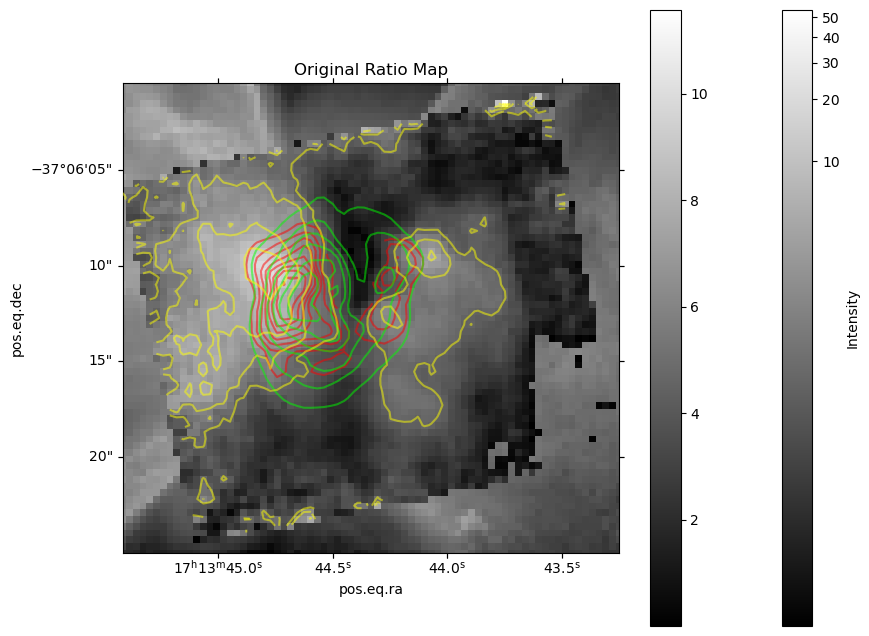

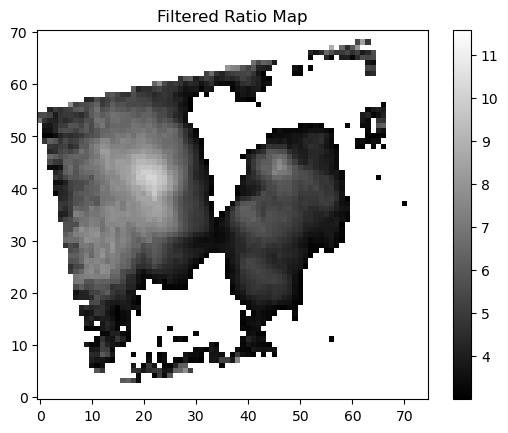

3179
Non-zero values in filtered_area_above_continuum_map: 475
Min/Max of filtered_area_above_continuum_map: 0.001325, 0.00902


<Figure size 640x480 with 0 Axes>

In [219]:
import numpy as np
import matplotlib.pyplot as plt
from mpdaf.obj import Cube
import astropy.units as u
import warnings
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS, FITSFixedWarning
from astropy.io import fits
from reproject import reproject_interp
from astropy.visualization import (MinMaxInterval, LogStretch, ImageNormalize)

# Ignore warnings
warnings.filterwarnings('ignore', category=FITSFixedWarning)
warnings.filterwarnings('ignore', category=UserWarning, message="Warning: converting a masked element to nan.")

# Load the optical image
optical_image_path = '/Users/mary/Downloads/hst_11504_01_wfc3_uvis_f658n_sci.fits'
optical_image_data, optical_image_header = fits.getdata(optical_image_path, header=True)
optical_wcs = WCS(optical_image_header)

# Load the data cube
cube_path = '/Users/mary/Fits image of JWST/ngc6302_ch4-short_s3d.fits'
obj1 = Cube(cube_path)

# Extract WCS from the FITS header of the data cube
cube_header = fits.getheader(cube_path, ext=1)  # Verify the correct extension
cube_wcs = WCS(cube_header).celestial  # Use only the celestial (spatial) part

# Load the saved maps
area_above_continuum_map = np.loadtxt('19area_above_continuum.txt')
area_below_continuum_map = np.loadtxt('19area_below_continuum.txt')
ratio_map = np.loadtxt('1ratio_map.txt')
# Calculate standard deviation for the area_above_continuum_map, ignoring NaNs
std_area_above_continuum_map = np.nanstd(area_above_continuum_map)
print(f"Standard Deviation of area_above_continuum_map: {std_area_above_continuum_map}")


# Calculate standard deviation for the ratio map, ignoring NaNs
std_ratio_map = np.nanstd(ratio_map)
print(f"Standard Deviation of Ratio Map: {std_ratio_map}")

# Define the RA and Dec coordinates of the central star
ra_deg = 258.43579167
dec_deg = -37.10359167
skycoord = SkyCoord(ra=ra_deg*u.degree, dec=dec_deg*u.degree, frame='icrs')

# Reproject the optical image to match the WCS of the data cube
reprojected_image, footprint = reproject_interp(
    (optical_image_data, optical_wcs), cube_wcs, shape_out=obj1.shape[1:]
)

# Check if the reprojected image is loaded correctly
if reprojected_image is None or reprojected_image.size == 0:
    raise ValueError("Reprojected image not loaded correctly.")

# Convert RA and Dec to pixel coordinates in the reprojected image
optical_pixel_coords = cube_wcs.world_to_pixel(skycoord)
optical_pixel_x, optical_pixel_y = int(optical_pixel_coords[0]), int(optical_pixel_coords[1])

# Apply a logarithmic scale to the image data
norm = ImageNormalize(reprojected_image, interval=MinMaxInterval(), stretch=LogStretch())

# Plot the reprojected optical image with contours
plt.figure(figsize=(10, 8))
ax = plt.subplot(projection=cube_wcs)

# Set plot limits to avoid cutting off the image and prevent white areas
ax.set_xlim(0, 74)  # Adjust these limits based on your data range
ax.set_ylim(0, 70)  # Adjust these limits based on your data range

# Display the reprojected image
im = ax.imshow(reprojected_image, cmap='gray', origin='lower', aspect='equal', norm=norm)

# Add color bar
plt.colorbar(im, ax=ax, label='Intensity')
# Filter the ratio map to only include values > std_ratio_map
higher_threshold = std_ratio_map * 3

filtered_ratio_map = np.where(np.isfinite(ratio_map) & (ratio_map > higher_threshold), ratio_map, np.nan)

filtered_ratio_map = np.where(ratio_map >3, ratio_map, np.nan)
filtered_area_above_continuum_map = np.where(area_above_continuum_map > std_area_above_continuum_map, area_above_continuum_map, np.nan)
# Overlay contours for the filtered ratio map
contour1 = ax.contour(filtered_area_above_continuum_map, colors='red', alpha=0.5, transform=ax.get_transform(cube_wcs))
contour2 = ax.contour(area_below_continuum_map, colors='lime', alpha=0.5, transform=ax.get_transform(cube_wcs))
contour3 = ax.contour(filtered_ratio_map, colors='yellow', alpha=0.5, transform=ax.get_transform(cube_wcs))
plt.imshow(ratio_map, origin='lower', cmap='gray')
plt.colorbar()
plt.title('Original Ratio Map')
plt.show()
   
plt.imshow(filtered_ratio_map, origin='lower', cmap='gray')
plt.colorbar()
plt.title('Filtered Ratio Map')
plt.show()
print(np.count_nonzero(np.isnan(filtered_ratio_map)))
# Label the contours of the filtered ratio map
#ax.clabel(contour1, inline=True, fontsize=8, fmt='%1.1f')


ax.clabel(contour3, inline=True, fontsize=8, fmt='%1.1f')
print(f"Non-zero values in filtered_area_above_continuum_map: {np.count_nonzero(~np.isnan(filtered_area_above_continuum_map))}") 
print(f"Min/Max of filtered_area_above_continuum_map: {np.nanmin(filtered_area_above_continuum_map)}, {np.nanmax(filtered_area_above_continuum_map)}")

# Define and plot specific points
specific_points = [
    (11.7641, 2.79749),
    (0.795407, 56.0104),
    (65.4217, 69.2025),
    (74.6117, 17.3236)
]
for x, y in specific_points:
    ax.scatter(x, y, color='red', s=50, edgecolor='black', marker='o', transform=ax.get_transform(cube_wcs))

# Connect the points to form a box
specific_points.append(specific_points[0])
x_coords, y_coords = zip(*specific_points)
ax.plot(x_coords, y_coords, color='red', linestyle='-', linewidth=1, transform=ax.get_transform(cube_wcs))

# Set axis labels
ax.set_xlabel('Right Ascension (J2000)')
ax.set_ylabel('Declination (J2000)') 
ax.coords['ra'].set_ticklabel_position('b')
ax.coords['dec'].set_ticklabel_position('l')
plt.tight_layout()
plt.savefig('modified_optical_image_with_filtered_contours_and_box.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show() 

Standard Deviation of area_above_continuum_map: 0.004344610721159577
Standard Deviation of Ratio Map: 1.5245715436560174
Non-zero values in filtered_area_above_continuum_map: 304
Min/Max of filtered_area_above_continuum_map: 0.004391, 0.022947


/var/folders/lr/h4dkpmd15k5876fbm2bxtr000000gn/T/ipykernel_31691/340165068.py:103: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, color='red', s=50, edgecolor='black', marker='', transform=ax.get_transform(cube_wcs))


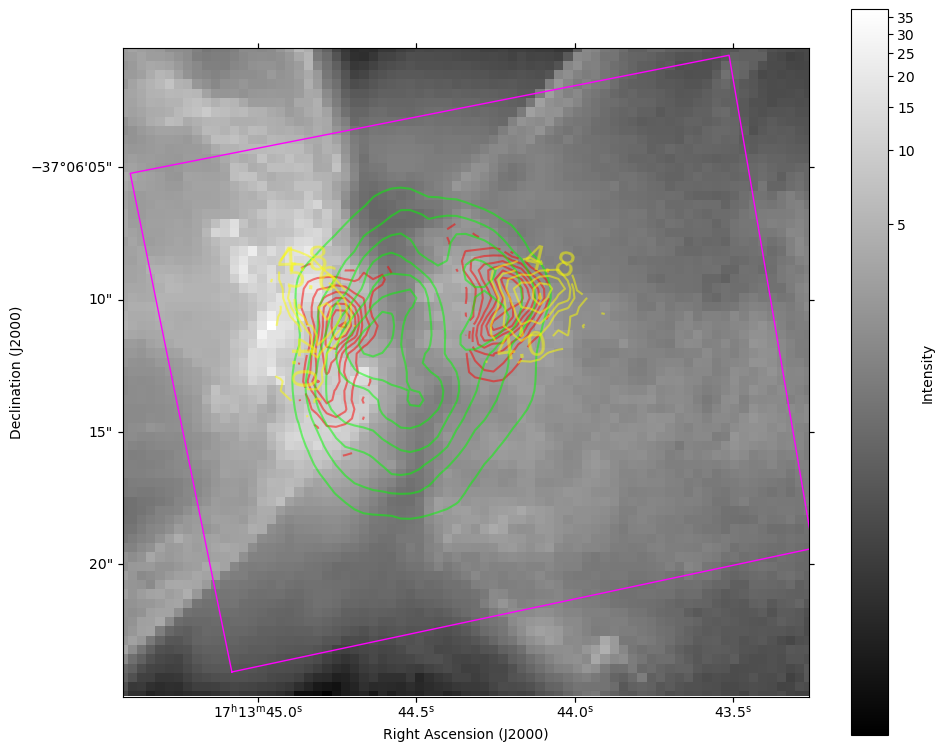

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from mpdaf.obj import Cube
import astropy.units as u
import warnings
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS, FITSFixedWarning
from astropy.io import fits
from reproject import reproject_interp
from astropy.visualization import (MinMaxInterval, LogStretch, ImageNormalize)

# Ignore warnings
warnings.filterwarnings('ignore', category=FITSFixedWarning)
warnings.filterwarnings('ignore', category=UserWarning, message="Warning: converting a masked element to nan.")

# Load the optical image
optical_image_path = '/Users/mary/Downloads/hst_11504_01_wfc3_uvis_f658n_sci.fits'
optical_image_data, optical_image_header = fits.getdata(optical_image_path, header=True)
optical_wcs = WCS(optical_image_header)

# Load the data cube
cube_path = '/Users/mary/Fits image of JWST/ngc6302_ch4-long_s3d.fits'
obj1 = Cube(cube_path)

# Extract WCS from the FITS header of the data cube
cube_header = fits.getheader(cube_path, ext=1)  # Verify the correct extension
cube_wcs = WCS(cube_header).celestial  # Use only the celestial (spatial) part

# Load the saved maps
area_above_continuum_map = np.loadtxt('24.5area_above_continuum.txt')
area_below_continuum_map = np.loadtxt('24.5area_below_continuum.txt')
ratio_map = np.loadtxt('24.5ratio_map.txt')
# Calculate standard deviation for the area_above_continuum_map, ignoring NaNs
std_area_above_continuum_map = np.nanstd(area_above_continuum_map)
print(f"Standard Deviation of area_above_continuum_map: {std_area_above_continuum_map}")


# Calculate standard deviation for the ratio map, ignoring NaNs
std_ratio_map = np.nanstd(ratio_map)
print(f"Standard Deviation of Ratio Map: {std_ratio_map}")

# Define the RA and Dec coordinates of the central star
ra_deg = 258.43579167
dec_deg = -37.10359167
skycoord = SkyCoord(ra=ra_deg*u.degree, dec=dec_deg*u.degree, frame='icrs')

# Reproject the optical image to match the WCS of the data cube
reprojected_image, footprint = reproject_interp(
    (optical_image_data, optical_wcs), cube_wcs, shape_out=obj1.shape[1:]
)

# Check if the reprojected image is loaded correctly
if reprojected_image is None or reprojected_image.size == 0:
    raise ValueError("Reprojected image not loaded correctly.")

# Convert RA and Dec to pixel coordinates in the reprojected image
optical_pixel_coords = cube_wcs.world_to_pixel(skycoord)
optical_pixel_x, optical_pixel_y = int(optical_pixel_coords[0]), int(optical_pixel_coords[1])

# Apply a logarithmic scale to the image data
norm = ImageNormalize(reprojected_image, interval=MinMaxInterval(), stretch=LogStretch())

# Plot the reprojected optical image with contours
plt.figure(figsize=(10, 8))
ax = plt.subplot(projection=cube_wcs)

# Set plot limits to avoid cutting off the image and prevent white areas
ax.set_xlim(0, 74)  # Adjust these limits based on your data range
ax.set_ylim(0, 70)  # Adjust these limits based on your data range

# Display the reprojected image
im = ax.imshow(reprojected_image, cmap='gray', origin='lower', aspect='equal', norm=norm)

# Add color bar
plt.colorbar(im, ax=ax, label='Intensity')

higher_threshold = std_ratio_map * 2
# Filter the ratio map to only include values > std_ratio_map
filtered_ratio_map = np.where(np.isfinite(ratio_map) & (ratio_map > higher_threshold), ratio_map, np.nan)
filtered_area_above_continuum_map = np.where(area_above_continuum_map > std_area_above_continuum_map, area_above_continuum_map, np.nan)
# Overlay contours for the filtered ratio map
contour1 = ax.contour(filtered_area_above_continuum_map, colors='red', alpha=0.5, transform=ax.get_transform(cube_wcs))
contour2 = ax.contour(area_below_continuum_map, colors='lime', alpha=0.5, transform=ax.get_transform(cube_wcs))
contour3 = ax.contour(filtered_ratio_map, colors='yellow', alpha=0.5, transform=ax.get_transform(cube_wcs))


# Label the contours of the filtered ratio map
#ax.clabel(contour1, inline=True, fontsize=8, fmt='%1.1f')


ax.clabel(contour3, inline=True, fontsize=24, fmt='%1.1f')
print(f"Non-zero values in filtered_area_above_continuum_map: {np.count_nonzero(~np.isnan(filtered_area_above_continuum_map))}") 
print(f"Min/Max of filtered_area_above_continuum_map: {np.nanmin(filtered_area_above_continuum_map)}, {np.nanmax(filtered_area_above_continuum_map)}")

# Define and plot specific points
specific_points = [
    (11.7641, 2.64927),
    (0.795407, 56.4551),
    (65.4217, 69.2025),
    (74.4635, 15.9896)
]
for x, y in specific_points:
    ax.scatter(x, y, color='red', s=50, edgecolor='black', marker='', transform=ax.get_transform(cube_wcs))

# Connect the points to form a box
specific_points.append(specific_points[0])
x_coords, y_coords = zip(*specific_points)
ax.plot(x_coords, y_coords, color='magenta', linestyle='-', linewidth=1, transform=ax.get_transform(cube_wcs))

# Set axis labels
ax.set_xlabel('Right Ascension (J2000)')
ax.set_ylabel('Declination (J2000)') 
ax.coords['ra'].set_ticklabel_position('b')
ax.coords['dec'].set_ticklabel_position('l')
plt.tight_layout()
plt.savefig('modified_optical_image_with_filtered_contours_and_box.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show() 

Standard Deviation of area_above_continuum_map: 0.01237069368325079
Standard Deviation of Ratio Map: 2.0917576226929873
Non-zero values in filtered_area_above_continuum_map: 503
Min/Max of filtered_area_above_continuum_map: 0.012431, 0.078068


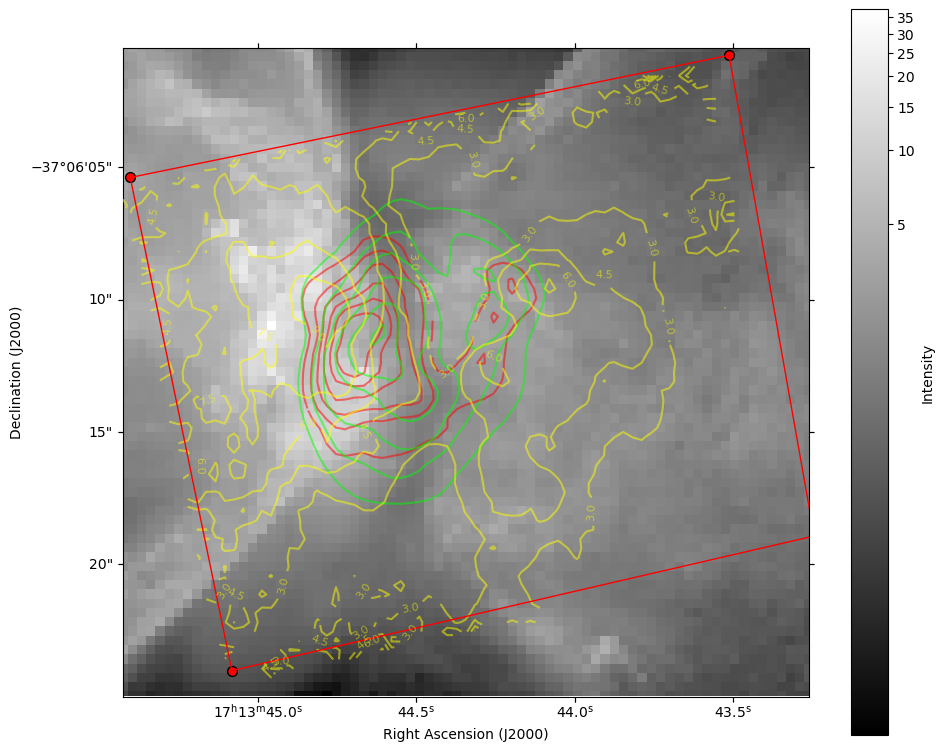

In [146]:
import numpy as np
import matplotlib.pyplot as plt
from mpdaf.obj import Cube
import astropy.units as u
import warnings
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS, FITSFixedWarning
from astropy.io import fits
from reproject import reproject_interp
from astropy.visualization import (MinMaxInterval, LogStretch, ImageNormalize)

# Ignore warnings
warnings.filterwarnings('ignore', category=FITSFixedWarning)
warnings.filterwarnings('ignore', category=UserWarning, message="Warning: converting a masked element to nan.")

# Load the optical image
optical_image_path = '/Users/mary/Downloads/hst_11504_01_wfc3_uvis_f658n_sci.fits'
optical_image_data, optical_image_header = fits.getdata(optical_image_path, header=True)
optical_wcs = WCS(optical_image_header)

# Load the data cube
cube_path = '/Users/mary/Fits image of JWST/ngc6302_ch4-long_s3d.fits'
obj1 = Cube(cube_path)

# Extract WCS from the FITS header of the data cube
cube_header = fits.getheader(cube_path, ext=1)  # Verify the correct extension
cube_wcs = WCS(cube_header).celestial  # Use only the celestial (spatial) part

# Load the saved maps
area_above_continuum_map = np.loadtxt('1area_above_continuum.txt')
area_below_continuum_map = np.loadtxt('1area_below_continuum.txt')
ratio_map = np.loadtxt('1ratio_map.txt')
# Calculate standard deviation for the area_above_continuum_map, ignoring NaNs
std_area_above_continuum_map = np.nanstd(area_above_continuum_map)
print(f"Standard Deviation of area_above_continuum_map: {std_area_above_continuum_map}")


# Calculate standard deviation for the ratio map, ignoring NaNs
std_ratio_map = np.nanstd(ratio_map)
print(f"Standard Deviation of Ratio Map: {std_ratio_map}")

# Define the RA and Dec coordinates of the central star
ra_deg = 258.43579167
dec_deg = -37.10359167
skycoord = SkyCoord(ra=ra_deg*u.degree, dec=dec_deg*u.degree, frame='icrs')

# Reproject the optical image to match the WCS of the data cube
reprojected_image, footprint = reproject_interp(
    (optical_image_data, optical_wcs), cube_wcs, shape_out=obj1.shape[1:]
)

# Check if the reprojected image is loaded correctly
if reprojected_image is None or reprojected_image.size == 0:
    raise ValueError("Reprojected image not loaded correctly.")

# Convert RA and Dec to pixel coordinates in the reprojected image
optical_pixel_coords = cube_wcs.world_to_pixel(skycoord)
optical_pixel_x, optical_pixel_y = int(optical_pixel_coords[0]), int(optical_pixel_coords[1])

# Apply a logarithmic scale to the image data
norm = ImageNormalize(reprojected_image, interval=MinMaxInterval(), stretch=LogStretch())

# Plot the reprojected optical image with contours
plt.figure(figsize=(10, 8))
ax = plt.subplot(projection=cube_wcs)

# Set plot limits to avoid cutting off the image and prevent white areas
ax.set_xlim(0, 74)  # Adjust these limits based on your data range
ax.set_ylim(0, 70)  # Adjust these limits based on your data range

# Display the reprojected image
im = ax.imshow(reprojected_image, cmap='gray', origin='lower', aspect='equal', norm=norm)

# Add color bar
plt.colorbar(im, ax=ax, label='Intensity')
# Filter the ratio map to only include values > std_ratio_map
higher_threshold = std_ratio_map * 2.09

filtered_ratio_map = np.where(np.isfinite(ratio_map) & (ratio_map > higher_threshold), ratio_map, np.nan)

filtered_ratio_map = np.where(ratio_map >2.09, ratio_map, np.nan)
filtered_area_above_continuum_map = np.where(area_above_continuum_map > std_area_above_continuum_map, area_above_continuum_map, np.nan)
# Overlay contours for the filtered ratio map
contour1 = ax.contour(filtered_area_above_continuum_map, colors='red', alpha=0.5, transform=ax.get_transform(cube_wcs))
contour2 = ax.contour(area_below_continuum_map, colors='lime', alpha=0.5, transform=ax.get_transform(cube_wcs))
contour3 = ax.contour(filtered_ratio_map, colors='yellow', alpha=0.5, transform=ax.get_transform(cube_wcs))

# Label the contours of the filtered ratio map
#ax.clabel(contour1, inline=True, fontsize=8, fmt='%1.1f')


ax.clabel(contour3, inline=True, fontsize=8, fmt='%1.1f')
print(f"Non-zero values in filtered_area_above_continuum_map: {np.count_nonzero(~np.isnan(filtered_area_above_continuum_map))}") 
print(f"Min/Max of filtered_area_above_continuum_map: {np.nanmin(filtered_area_above_continuum_map)}, {np.nanmax(filtered_area_above_continuum_map)}")

# Define and plot specific points
specific_points = [
    (11.7641, 2.79749),
    (0.795407, 56.0104),
    (65.4217, 69.2025),
    (74.6117, 17.3236)
]
for x, y in specific_points:
    ax.scatter(x, y, color='red', s=50, edgecolor='black', marker='o', transform=ax.get_transform(cube_wcs))

# Connect the points to form a box
specific_points.append(specific_points[0])
x_coords, y_coords = zip(*specific_points)
ax.plot(x_coords, y_coords, color='red', linestyle='-', linewidth=1, transform=ax.get_transform(cube_wcs))

# Set axis labels
ax.set_xlabel('Right Ascension (J2000)')
ax.set_ylabel('Declination (J2000)') 
ax.coords['ra'].set_ticklabel_position('b')
ax.coords['dec'].set_ticklabel_position('l')
plt.tight_layout()
plt.savefig('bafitermodified_optical_image_with_filtered_contours_and_box.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show() 

Standard Deviation of area_above_continuum_map: 0.01237069368325079
Standard Deviation of Ratio Map: 2.0917576226929873


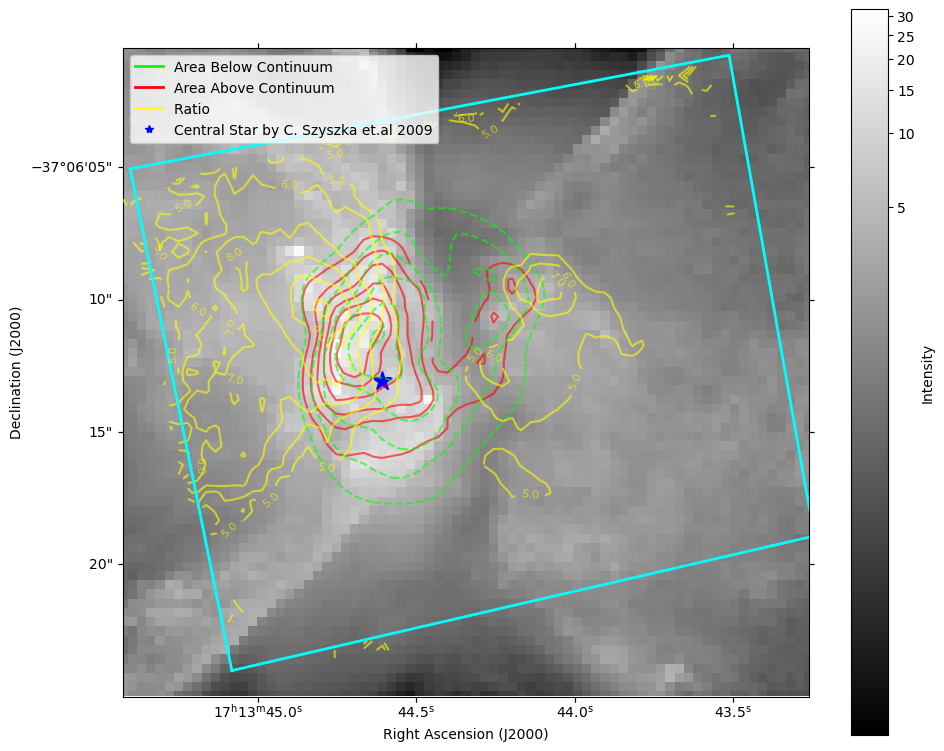

Angular distances between box vertices (in arcseconds): [<Angle 19.33494526 arcsec>, <Angle 23.0227625 arcsec>, <Angle 18.44030481 arcsec>, <Angle 22.57656963 arcsec>]
Box width: 23.022762504767133 arcsec, Given width: 22.9 arcsec
Box height: 19.334945255302273 arcsec, Given height: 19.3 arcsec
The box matches the given mapping coverage.


In [57]:
import numpy as np
import matplotlib.pyplot as plt
from mpdaf.obj import Cube
import astropy.units as u
import warnings
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS, FITSFixedWarning
from astropy.io import fits
from reproject import reproject_interp
from astropy.visualization import (MinMaxInterval, LogStretch, ImageNormalize)

# Ignore warnings
warnings.filterwarnings('ignore', category=FITSFixedWarning)
warnings.filterwarnings('ignore', category=UserWarning, message="Warning: converting a masked element to nan.")

# Load the optical image
optical_image_path = '/Users/mary/Downloads/F658N2009_tweak2F110W_drc_Gaia.fits'
optical_image_data, optical_image_header = fits.getdata(optical_image_path, header=True)
optical_wcs = WCS(optical_image_header)

# Load the data cube
cube_path = '/Users/mary/Fits image of JWST/ngc6302_ch4-long_s3d.fits'
obj1 = Cube(cube_path)

# Extract WCS from the FITS header of the data cube
cube_header = fits.getheader(cube_path, ext=1)  # Verify the correct extension
cube_wcs = WCS(cube_header).celestial  # Use only the celestial (spatial) part

# Load the saved maps
area_above_continuum_map = np.loadtxt('1area_above_continuum.txt')
area_below_continuum_map = np.loadtxt('1area_below_continuum.txt')
ratio_map = np.loadtxt('1ratio_map.txt')

# Define the RA and Dec coordinates of the central star
ra_deg = 258.43579167
dec_deg = -37.10359167
skycoord = SkyCoord(ra=ra_deg*u.degree, dec=dec_deg*u.degree, frame='icrs')

# Reproject the optical image to match the WCS of the data cube
reprojected_image, footprint = reproject_interp(
    (optical_image_data, optical_wcs), cube_wcs, shape_out=obj1.shape[1:]
)

# Check if the reprojected image is loaded correctly
if reprojected_image is None or reprojected_image.size == 0:
    raise ValueError("Reprojected image not loaded correctly.")

# Convert RA and Dec to pixel coordinates in the reprojected image
optical_pixel_coords = cube_wcs.world_to_pixel(skycoord)
optical_pixel_x, optical_pixel_y = int(optical_pixel_coords[0]), int(optical_pixel_coords[1])

# Apply a logarithmic scale to the image data
norm = ImageNormalize(reprojected_image, interval=MinMaxInterval(), stretch=LogStretch())

# Plot the reprojected optical image with contours
plt.figure(figsize=(10, 8))
ax = plt.subplot(projection=cube_wcs)

# Set plot limits to avoid cutting off the image and prevent white areas
ax.set_xlim(0, 74)  # Adjust these limits based on your data range
ax.set_ylim(0, 70)  # Adjust these limits based on your data range

# Display the reprojected image
im = ax.imshow(reprojected_image, cmap='gray', origin='lower', aspect='equal', norm=norm)

# Add color bar
plt.colorbar(im, ax=ax, label='Intensity')

# Filter the ratio map to only include values > std_ratio_map
#higher_threshold = std_ratio_map * 2

#filtered_ratio_map = np.where(np.isfinite(ratio_map) & (ratio_map > higher_threshold), ratio_map, np.nan)

#filtered_ratio_map = np.where(ratio_map >3, ratio_map, np.nan)
filtered_area_above_continuum_map = np.where(area_above_continuum_map > std_area_above_continuum_map, area_above_continuum_map, np.nan)
# Overlay contours for the filtered ratio map
contour1 = ax.contour(filtered_area_above_continuum_map, colors='red', alpha=0.6, transform=ax.get_transform(cube_wcs))
contour2 = ax.contour(area_below_continuum_map, colors='lime',linestyles='--', alpha=0.6, transform=ax.get_transform(cube_wcs))
contour3 = ax.contour(filtered_ratio_map, colors='yellow', alpha=0.6, transform=ax.get_transform(cube_wcs))
# Label the contours of the filtered ratio map
ax.clabel(contour3, inline=True, fontsize=8, fmt='%1.1f')
# Calculate standard deviation for the area_above_continuum_map, ignoring NaNs
std_area_above_continuum_map = np.nanstd(area_above_continuum_map)
print(f"Standard Deviation of area_above_continuum_map: {std_area_above_continuum_map}")


# Calculate standard deviation for the ratio map, ignoring NaNs
std_ratio_map = np.nanstd(ratio_map)
print(f"Standard Deviation of Ratio Map: {std_ratio_map}")

# Define and plot specific points for the magenta box
specific_points = [
    (11.7641, 2.79749),
    (0.795407, 56.9403),
    (65.4217, 69.2025),
    (74.6117, 17.3236)
]
for x, y in specific_points:
    ax.scatter(x, y, color='red', s=50, marker='none', transform=ax.get_transform(cube_wcs))

# Connect the points to form a box
specific_points.append(specific_points[0])
x_coords, y_coords = zip(*specific_points)
ax.plot(x_coords, y_coords, color='cyan', linestyle='-', linewidth=2, transform=ax.get_transform(cube_wcs))


# Mark the central star
plt.scatter(optical_pixel_x, optical_pixel_y, color='blue', marker='*', s=200, label='Central Star by C. Szyszka et.al 2009')


# Add legend
red_patch = plt.Line2D([0], [0], color='lime', lw=2, label='Area Below Continuum')
blue_patch = plt.Line2D([0], [0], color='red', lw=2, label='Area Above Continuum')
green_patch = plt.Line2D([0], [0], color='yellow', lw=2, label='Ratio ')
plt.legend(handles=[red_patch, blue_patch, green_patch, plt.Line2D([0], [0], color='blue', marker='*', lw=0, label='Central Star by C. Szyszka et.al 2009')], loc='upper left')


# Set axis labels
ax.set_xlabel('Right Ascension (J2000)')
ax.set_ylabel('Declination (J2000)') 
ax.coords['ra'].set_ticklabel_position('b')
ax.coords['dec'].set_ticklabel_position('l')
plt.tight_layout()
plt.savefig('ok23modified_optical_image_with_box.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

# Check the angular size of the magenta box

# Convert pixel coordinates to world (RA/Dec) coordinates
world_coords = cube_wcs.pixel_to_world_values(np.array(x_coords), np.array(y_coords))

# Calculate the angular distance between consecutive points
from astropy.coordinates import SkyCoord
from astropy import units as u

ra_list, dec_list = world_coords[0], world_coords[1]
coord_list = SkyCoord(ra=ra_list, dec=dec_list, unit='deg')

# Calculate angular distances between consecutive vertices of the box
angular_distances = []
for i in range(len(coord_list) - 1):
    angular_distances.append(coord_list[i].separation(coord_list[i + 1]).to(u.arcsec))

# Print the angular distances
print("Angular distances between box vertices (in arcseconds):", angular_distances)

# Check if the box dimensions match the given coverage
box_width = angular_distances[1]  # Assuming the box's width is the distance between two horizontal points
box_height = angular_distances[0]  # Assuming the box's height is the distance between two vertical points

# Given coverage dimensions
mapping_width = 22.9 * u.arcsec
mapping_height = 19.3 * u.arcsec

# Print the comparison results
print(f"Box width: {box_width}, Given width: {mapping_width}")
print(f"Box height: {box_height}, Given height: {mapping_height}")

# Check if the box matches the coverage
if np.isclose(box_width.value, mapping_width.value, rtol=0.05) and np.isclose(box_height.value, mapping_height.value, rtol=0.05):
    print("The box matches the given mapping coverage.")
else:
    print("The box does not match the given mapping coverage.")


Pixel scale: 0.350 arcseconds per pixel
Pixel height corresponding to 19.3 arcseconds: 55.14 pixels
Original top point: (0.795407, 56.9403)
Adjusted top point: (0.795407, 56.940348081934445)


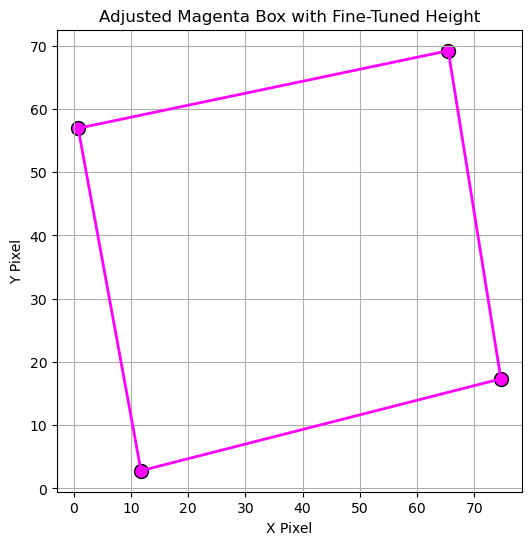

Angular distances between box vertices (in arcseconds): [<Angle 19.33496175 arcsec>, <Angle 23.02275937 arcsec>, <Angle 18.44030481 arcsec>, <Angle 22.57656963 arcsec>]
Box width: 23.022759367636926 arcsec, Given width: 22.9 arcsec
Box height: 19.334961748901414 arcsec, Given height: 19.3 arcsec
The box matches the given mapping coverage.


In [201]:
import numpy as np
import matplotlib.pyplot as plt
from mpdaf.obj import Cube
import astropy.units as u
from astropy.wcs import WCS
from astropy.io import fits

# Load the data cube
cube_path = '/Users/mary/Fits image of JWST/ngc6302_ch4-long_s3d.fits'
obj1 = Cube(cube_path)

# Extract WCS from the FITS header of the data cube
cube_header = fits.getheader(cube_path, ext=1)  # Use the correct extension
cube_wcs = WCS(cube_header).celestial  # Use only the celestial (spatial) part

# Get the pixel scale (arcseconds per pixel)
pixel_scale = np.abs(cube_wcs.pixel_scale_matrix[1, 1]) * u.deg.to(u.arcsec)
print(f"Pixel scale: {pixel_scale:.3f} arcseconds per pixel")

# Desired height in arcseconds
desired_height_arcsec = 19.3  # arcseconds

# Calculate the number of pixels corresponding to the desired height
pixel_height = desired_height_arcsec / pixel_scale
print(f"Pixel height corresponding to 19.3 arcseconds: {pixel_height:.2f} pixels")

# Define the original specific points for the magenta box
specific_points = [
    (11.7641, 2.79749),   # Point 1 (bottom)
    (0.795407, 56.9403),     # Point 2 (top), manually set to 57.0 for this example
    (65.4217, 69.2025),   # Point 3
    (74.6117, 17.3236)    # Point 4
]

# Bottom point (fixed)
bottom_point = specific_points[0]  # Bottom point stays the same
top_point = specific_points[1]

# Since the current height is 19.67 arcseconds, we'll reduce the top point Y by ~1 pixel to lower the height
adjusted_pixel_height = pixel_height - 1  # Fine-tuning the Y-coordinate by reducing the pixel height by 1 pixel

# Calculate the new y-coordinate for the top point
new_top_y = bottom_point[1] + adjusted_pixel_height

# Update the top point's y-coordinate
adjusted_top_point = (top_point[0], new_top_y)

# Update the specific points with the adjusted top point
adjusted_specific_points = [
    bottom_point,
    adjusted_top_point,
    specific_points[2],
    specific_points[3]
]

# Print the adjusted points
print(f"Original top point: {top_point}")
print(f"Adjusted top point: {adjusted_top_point}")

# Display the results (for visual testing)
plt.figure(figsize=(6, 6))
for x, y in adjusted_specific_points:
    plt.scatter(x, y, color='magenta', s=100, edgecolor='black')

# Connect the points to form a box
adjusted_specific_points.append(adjusted_specific_points[0])
x_coords, y_coords = zip(*adjusted_specific_points)
plt.plot(x_coords, y_coords, color='magenta', linestyle='-', linewidth=2)

plt.title('Adjusted Magenta Box with Fine-Tuned Height')
plt.xlabel('X Pixel')
plt.ylabel('Y Pixel')
plt.grid(True)
plt.show()

# Check the angular size of the magenta box

# Convert pixel coordinates to world (RA/Dec) coordinates
world_coords = cube_wcs.pixel_to_world_values(np.array(x_coords), np.array(y_coords))

# Calculate the angular distance between consecutive points
from astropy.coordinates import SkyCoord
from astropy import units as u

ra_list, dec_list = world_coords[0], world_coords[1]
coord_list = SkyCoord(ra=ra_list, dec=dec_list, unit='deg')

# Calculate angular distances between consecutive vertices of the box
angular_distances = []
for i in range(len(coord_list) - 1):
    angular_distances.append(coord_list[i].separation(coord_list[i + 1]).to(u.arcsec))

# Print the angular distances
print("Angular distances between box vertices (in arcseconds):", angular_distances)

# Check if the box dimensions match the given coverage
box_width = angular_distances[1]  # Assuming the box's width is the distance between two horizontal points
box_height = angular_distances[0]  # Assuming the box's height is the distance between two vertical points

# Given coverage dimensions
mapping_width = 22.9 * u.arcsec
mapping_height = 19.3 * u.arcsec

# Print the comparison results
print(f"Box width: {box_width}, Given width: {mapping_width}")
print(f"Box height: {box_height}, Given height: {mapping_height}")

# Check if the box matches the coverage
if np.isclose(box_width.value, mapping_width.value, rtol=0.05) and np.isclose(box_height.value, mapping_height.value, rtol=0.05):
    print("The box matches the given mapping coverage.")
else:
    print("The box does not match the given mapping coverage.")


Standard Deviation of area_above_continuum_map: 0.0019133988593821884
Standard Deviation of Ratio Map: 1.4682600952532894


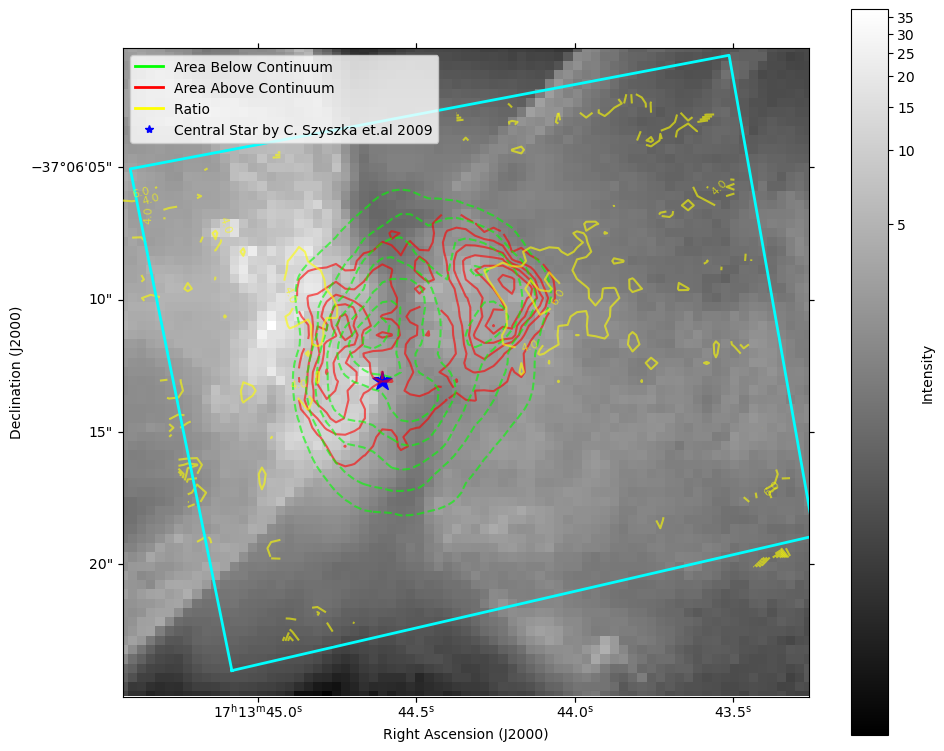

Angular distances between box vertices (in arcseconds): [<Angle 19.33494526 arcsec>, <Angle 23.0227625 arcsec>, <Angle 18.44030481 arcsec>, <Angle 22.57656963 arcsec>]
Box width: 23.022762504767133 arcsec, Given width: 22.9 arcsec
Box height: 19.334945255302273 arcsec, Given height: 19.3 arcsec
The box matches the given mapping coverage.


In [86]:
import numpy as np
import matplotlib.pyplot as plt
from mpdaf.obj import Cube
import astropy.units as u
import warnings
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS, FITSFixedWarning
from astropy.io import fits
from reproject import reproject_interp
from astropy.visualization import (MinMaxInterval, LogStretch, ImageNormalize)

# Ignore warnings
warnings.filterwarnings('ignore', category=FITSFixedWarning)
warnings.filterwarnings('ignore', category=UserWarning, message="Warning: converting a masked element to nan.")

# Load the optical image
optical_image_path = '/Users/mary/Downloads/hst_11504_01_wfc3_uvis_f658n_sci.fits'
optical_image_data, optical_image_header = fits.getdata(optical_image_path, header=True)
optical_wcs = WCS(optical_image_header)

# Load the data cube
cube_path = '/Users/mary/Fits image of JWST/ngc6302_ch4-long_s3d.fits'
obj1 = Cube(cube_path)

# Extract WCS from the FITS header of the data cube
cube_header = fits.getheader(cube_path, ext=1)  # Verify the correct extension
cube_wcs = WCS(cube_header).celestial  # Use only the celestial (spatial) part

# Load the saved maps
area_above_continuum_map = np.loadtxt('2224.5_area_above_continuum.txt')
area_below_continuum_map = np.loadtxt('2224.5_area_below_continuum.txt')
ratio_map = np.loadtxt('2224.5_ratio_map.txt')

# Define the RA and Dec coordinates of the central star
ra_deg = 258.43579167
dec_deg = -37.10359167
skycoord = SkyCoord(ra=ra_deg*u.degree, dec=dec_deg*u.degree, frame='icrs')

# Reproject the optical image to match the WCS of the data cube
reprojected_image, footprint = reproject_interp(
    (optical_image_data, optical_wcs), cube_wcs, shape_out=obj1.shape[1:]
)

# Check if the reprojected image is loaded correctly
if reprojected_image is None or reprojected_image.size == 0:
    raise ValueError("Reprojected image not loaded correctly.")

# Convert RA and Dec to pixel coordinates in the reprojected image
optical_pixel_coords = cube_wcs.world_to_pixel(skycoord)
optical_pixel_x, optical_pixel_y = int(optical_pixel_coords[0]), int(optical_pixel_coords[1])

# Apply a logarithmic scale to the image data
norm = ImageNormalize(reprojected_image, interval=MinMaxInterval(), stretch=LogStretch())

# Plot the reprojected optical image with contours
plt.figure(figsize=(10, 8))
ax = plt.subplot(projection=cube_wcs)

# Set plot limits to avoid cutting off the image and prevent white areas
ax.set_xlim(0, 74)  # Adjust these limits based on your data range
ax.set_ylim(0, 70)  # Adjust these limits based on your data range

# Display the reprojected image
im = ax.imshow(reprojected_image, cmap='gray', origin='lower', aspect='equal', norm=norm)

# Add color bar
plt.colorbar(im, ax=ax, label='Intensity')

# Filter the ratio map to only include values > std_ratio_map
#higher_threshold = std_ratio_map * 1

#filtered_ratio_map = np.where(np.isfinite(ratio_map) & (ratio_map > higher_threshold), ratio_map, np.nan)

 #Filter the ratio map to only include values > std_ratio_map
filtered_ratio_map = np.where(ratio_map >2, ratio_map, np.nan)
filtered_area_above_continuum_map = np.where(area_above_continuum_map > std_area_above_continuum_map, area_above_continuum_map, np.nan)
# Overlay contours for the filtered ratio map
contour1 = ax.contour(filtered_area_above_continuum_map, colors='red', alpha=0.6, transform=ax.get_transform(cube_wcs))
contour2 = ax.contour(area_below_continuum_map, colors='lime',linestyles='--', alpha=0.6, transform=ax.get_transform(cube_wcs))
contour3 = ax.contour(filtered_ratio_map, colors='yellow', alpha=0.6, transform=ax.get_transform(cube_wcs))


# Label the contours of the filtered ratio map
ax.clabel(contour3, inline=True, fontsize=8, fmt='%1.1f')
# Calculate standard deviation for the area_above_continuum_map, ignoring NaNs
std_area_above_continuum_map = np.nanstd(area_above_continuum_map)
print(f"Standard Deviation of area_above_continuum_map: {std_area_above_continuum_map}")


# Calculate standard deviation for the ratio map, ignoring NaNs
std_ratio_map = np.nanstd(ratio_map)
print(f"Standard Deviation of Ratio Map: {std_ratio_map}")

# Define and plot specific points for the magenta box
specific_points = [
    (11.7641, 2.79749),
    (0.795407, 56.9403),
    (65.4217, 69.2025),
    (74.6117, 17.3236)
]
for x, y in specific_points:
    ax.scatter(x, y, color='red', s=50, marker='none', transform=ax.get_transform(cube_wcs))

# Connect the points to form a box
specific_points.append(specific_points[0])
x_coords, y_coords = zip(*specific_points)
ax.plot(x_coords, y_coords, color='cyan', linestyle='-', linewidth=2, transform=ax.get_transform(cube_wcs))


# Mark the central star
plt.scatter(optical_pixel_x, optical_pixel_y, color='blue', marker='*', s=200, label='Central Star by C. Szyszka et.al 2009')


# Add legend
red_patch = plt.Line2D([0], [0], color='lime', lw=2, label='Area Below Continuum')
blue_patch = plt.Line2D([0], [0], color='red', lw=2, label='Area Above Continuum')
green_patch = plt.Line2D([0], [0], color='yellow', lw=2, label='Ratio ')
plt.legend(handles=[red_patch, blue_patch, green_patch, plt.Line2D([0], [0], color='blue', marker='*', lw=0, label='Central Star by C. Szyszka et.al 2009')], loc='upper left')


# Set axis labels
ax.set_xlabel('Right Ascension (J2000)')
ax.set_ylabel('Declination (J2000)') 
ax.coords['ra'].set_ticklabel_position('b')
ax.coords['dec'].set_ticklabel_position('l')
plt.tight_layout()
plt.savefig('2251modified_optical_image_with_box.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

# Check the angular size of the magenta box

# Convert pixel coordinates to world (RA/Dec) coordinates
world_coords = cube_wcs.pixel_to_world_values(np.array(x_coords), np.array(y_coords))

# Calculate the angular distance between consecutive points
from astropy.coordinates import SkyCoord
from astropy import units as u

ra_list, dec_list = world_coords[0], world_coords[1]
coord_list = SkyCoord(ra=ra_list, dec=dec_list, unit='deg')

# Calculate angular distances between consecutive vertices of the box
angular_distances = []
for i in range(len(coord_list) - 1):
    angular_distances.append(coord_list[i].separation(coord_list[i + 1]).to(u.arcsec))

# Print the angular distances
print("Angular distances between box vertices (in arcseconds):", angular_distances)

# Check if the box dimensions match the given coverage
box_width = angular_distances[1]  # Assuming the box's width is the distance between two horizontal points
box_height = angular_distances[0]  # Assuming the box's height is the distance between two vertical points

# Given coverage dimensions
mapping_width = 22.9 * u.arcsec
mapping_height = 19.3 * u.arcsec

# Print the comparison results
print(f"Box width: {box_width}, Given width: {mapping_width}")
print(f"Box height: {box_height}, Given height: {mapping_height}")

# Check if the box matches the coverage
if np.isclose(box_width.value, mapping_width.value, rtol=0.05) and np.isclose(box_height.value, mapping_height.value, rtol=0.05):
    print("The box matches the given mapping coverage.")
else:
    print("The box does not match the given mapping coverage.")



Standard Deviation of area_above_continuum_map: 0.0019681013385857483
Standard Deviation of Ratio Map: 1.623649281882996


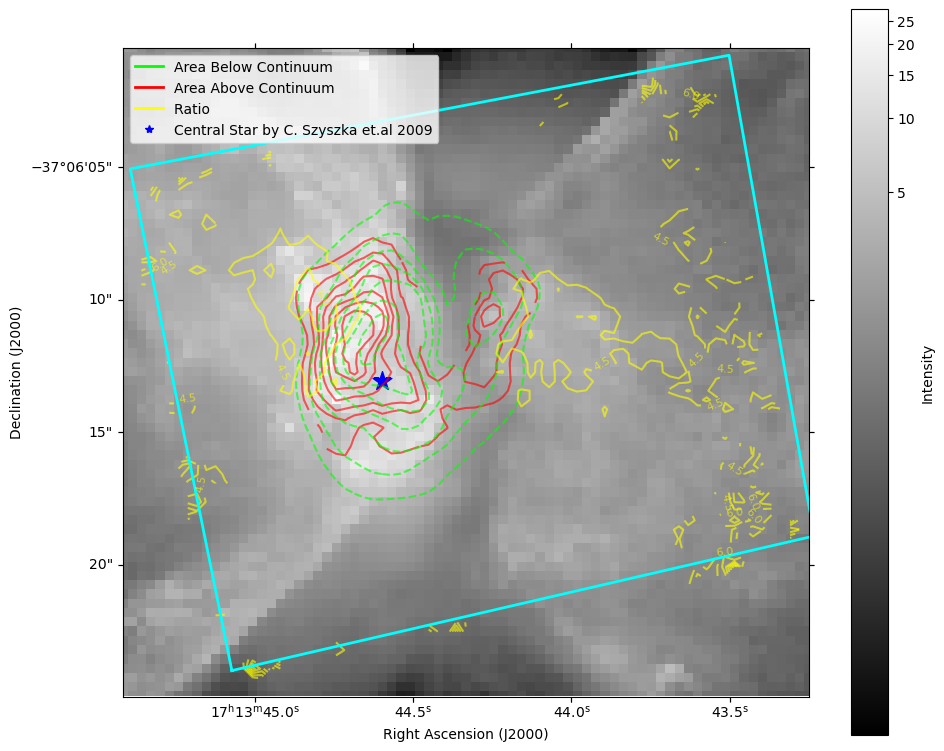

Angular distances between box vertices (in arcseconds): [<Angle 19.33494526 arcsec>, <Angle 23.0227625 arcsec>, <Angle 18.44030481 arcsec>, <Angle 22.57656963 arcsec>]
Box width: 23.02276250463251 arcsec, Given width: 22.9 arcsec
Box height: 19.334945255309638 arcsec, Given height: 19.3 arcsec
The box matches the given mapping coverage.


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpdaf.obj import Cube
import astropy.units as u
import warnings
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS, FITSFixedWarning
from astropy.io import fits
from reproject import reproject_interp
from astropy.visualization import (MinMaxInterval, LogStretch, ImageNormalize)

# Ignore warnings
warnings.filterwarnings('ignore', category=FITSFixedWarning)
warnings.filterwarnings('ignore', category=UserWarning, message="Warning: converting a masked element to nan.")

# Load the optical image
optical_image_path = '/Users/mary/Downloads/F658N2009_tweak2F110W_drc_Gaia.fits'
optical_image_data, optical_image_header = fits.getdata(optical_image_path, header=True)
optical_wcs = WCS(optical_image_header)

# Load the data cube
cube_path = '/Users/mary/Fits image of JWST/ngc6302_ch4-short_s3d.fits'
obj1 = Cube(cube_path)

# Extract WCS from the FITS header of the data cube
cube_header = fits.getheader(cube_path, ext=1)  # Verify the correct extension
cube_wcs = WCS(cube_header).celestial  # Use only the celestial (spatial) part

# Load the saved maps
area_above_continuum_map = np.loadtxt('1900area_above_continuum.txt')
area_below_continuum_map = np.loadtxt('1900area_below_continuum.txt')
ratio_map = np.loadtxt('1900ratio_map.txt')

# Define the RA and Dec coordinates of the central star
ra_deg = 258.43579167
dec_deg = -37.10359167
skycoord = SkyCoord(ra=ra_deg*u.degree, dec=dec_deg*u.degree, frame='icrs')

# Reproject the optical image to match the WCS of the data cube
reprojected_image, footprint = reproject_interp(
    (optical_image_data, optical_wcs), cube_wcs, shape_out=obj1.shape[1:]
)

# Check if the reprojected image is loaded correctly
if reprojected_image is None or reprojected_image.size == 0:
    raise ValueError("Reprojected image not loaded correctly.")

# Convert RA and Dec to pixel coordinates in the reprojected image
optical_pixel_coords = cube_wcs.world_to_pixel(skycoord)
optical_pixel_x, optical_pixel_y = int(optical_pixel_coords[0]), int(optical_pixel_coords[1])

# Apply a logarithmic scale to the image data
norm = ImageNormalize(reprojected_image, interval=MinMaxInterval(), stretch=LogStretch())

# Plot the reprojected optical image with contours
plt.figure(figsize=(10, 8))
ax = plt.subplot(projection=cube_wcs)

# Set plot limits to avoid cutting off the image and prevent white areas
ax.set_xlim(0, 74)  # Adjust these limits based on your data range
ax.set_ylim(0, 70)  # Adjust these limits based on your data range

# Display the reprojected image
im = ax.imshow(reprojected_image, cmap='gray', origin='lower', aspect='equal', norm=norm)

# Add color bar
plt.colorbar(im, ax=ax, label='Intensity')

# Filter the ratio map to only include values > std_ratio_map
higher_threshold = std_ratio_map * 2

filtered_ratio_map = np.where(np.isfinite(ratio_map) & (ratio_map > higher_threshold), ratio_map, np.nan)

#Filter the ratio map to only include values > std_ratio_map
#filtered_ratio_map = np.where(ratio_map > 2, ratio_map, np.nan)
filtered_area_above_continuum_map = np.where(area_above_continuum_map > std_area_above_continuum_map, area_above_continuum_map, np.nan)
# Overlay contours for the filtered ratio map
contour1 = ax.contour(filtered_area_above_continuum_map, colors='red', alpha=0.6, transform=ax.get_transform(cube_wcs))
contour2 = ax.contour(area_below_continuum_map, colors='lime',linestyles='--', alpha=0.6, transform=ax.get_transform(cube_wcs))
contour3 = ax.contour(filtered_ratio_map, colors='yellow', alpha=0.6, transform=ax.get_transform(cube_wcs))


# Label the contours of the filtered ratio map
ax.clabel(contour3, inline=True, fontsize=8, fmt='%1.1f')
# Label the contours of the filtered ratio map
#ax.clabel(contour1, inline=True, fontsize=14, fmt='%1.1f')
# Calculate standard deviation for the area_above_continuum_map, ignoring NaNs
std_area_above_continuum_map = np.nanstd(area_above_continuum_map)
print(f"Standard Deviation of area_above_continuum_map: {std_area_above_continuum_map}")


# Calculate standard deviation for the ratio map, ignoring NaNs
std_ratio_map = np.nanstd(ratio_map)
print(f"Standard Deviation of Ratio Map: {std_ratio_map}")

# Define and plot specific points for the magenta box
specific_points = [
    (11.7641, 2.79749),
    (0.795407, 56.9403),
    (65.4217, 69.2025),
    (74.6117, 17.3236)
]
for x, y in specific_points:
    ax.scatter(x, y, color='red', s=50, marker='none', transform=ax.get_transform(cube_wcs))

# Connect the points to form a box
specific_points.append(specific_points[0])
x_coords, y_coords = zip(*specific_points)
ax.plot(x_coords, y_coords, color='cyan', linestyle='-', linewidth=2, transform=ax.get_transform(cube_wcs))


# Mark the central star
plt.scatter(optical_pixel_x, optical_pixel_y, color='blue', marker='*', s=200, label='Central Star by C. Szyszka et.al 2009')


# Add legend
red_patch = plt.Line2D([0], [0], color='lime', lw=2, label='Area Below Continuum')
blue_patch = plt.Line2D([0], [0], color='red', lw=2, label='Area Above Continuum')
green_patch = plt.Line2D([0], [0], color='yellow', lw=2, label='Ratio ')
plt.legend(handles=[red_patch, blue_patch, green_patch, plt.Line2D([0], [0], color='blue', marker='*', lw=0, label='Central Star by C. Szyszka et.al 2009')], loc='upper left')


# Set axis labels
ax.set_xlabel('Right Ascension (J2000)')
ax.set_ylabel('Declination (J2000)') 
ax.coords['ra'].set_ticklabel_position('b')
ax.coords['dec'].set_ticklabel_position('l')
plt.tight_layout()
plt.savefig('1900modified_optical_image_with_box.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

# Check the angular size of the magenta box

# Convert pixel coordinates to world (RA/Dec) coordinates
world_coords = cube_wcs.pixel_to_world_values(np.array(x_coords), np.array(y_coords))

# Calculate the angular distance between consecutive points
from astropy.coordinates import SkyCoord
from astropy import units as u

ra_list, dec_list = world_coords[0], world_coords[1]
coord_list = SkyCoord(ra=ra_list, dec=dec_list, unit='deg')

# Calculate angular distances between consecutive vertices of the box
angular_distances = []
for i in range(len(coord_list) - 1):
    angular_distances.append(coord_list[i].separation(coord_list[i + 1]).to(u.arcsec))

# Print the angular distances
print("Angular distances between box vertices (in arcseconds):", angular_distances)

# Check if the box dimensions match the given coverage
box_width = angular_distances[1]  # Assuming the box's width is the distance between two horizontal points
box_height = angular_distances[0]  # Assuming the box's height is the distance between two vertical points

# Given coverage dimensions
mapping_width = 22.9 * u.arcsec
mapping_height = 19.3 * u.arcsec

# Print the comparison results
print(f"Box width: {box_width}, Given width: {mapping_width}")
print(f"Box height: {box_height}, Given height: {mapping_height}")

# Check if the box matches the coverage
if np.isclose(box_width.value, mapping_width.value, rtol=0.05) and np.isclose(box_height.value, mapping_height.value, rtol=0.05):
    print("The box matches the given mapping coverage.")
else:
    print("The box does not match the given mapping coverage.")




Standard Deviation of Ratio Map: 1.5767563883738265
Standard Deviation of area_above_continuum_map: 0.002034517662476384


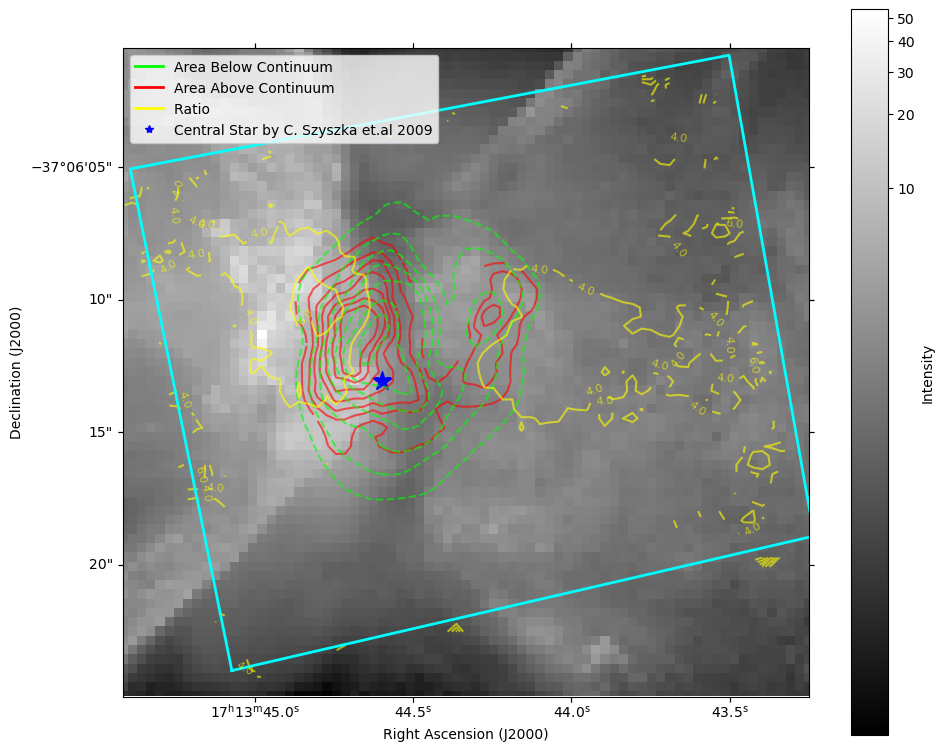

Angular distances between box vertices (in arcseconds): [<Angle 19.33494526 arcsec>, <Angle 23.0227625 arcsec>, <Angle 18.44030481 arcsec>, <Angle 22.57656963 arcsec>]


In [77]:
import numpy as np
import matplotlib.pyplot as plt
from mpdaf.obj import Cube
import astropy.units as u
import warnings
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS, FITSFixedWarning
from astropy.io import fits
from reproject import reproject_interp
from astropy.visualization import (MinMaxInterval, LogStretch, ImageNormalize)

# Ignore warnings
warnings.filterwarnings('ignore', category=FITSFixedWarning)
warnings.filterwarnings('ignore', category=UserWarning, message="Warning: converting a masked element to nan.")

# Load the optical image
optical_image_path = '/Users/mary/Downloads/hst_11504_01_wfc3_uvis_f658n_sci.fits'
optical_image_data, optical_image_header = fits.getdata(optical_image_path, header=True)
optical_wcs = WCS(optical_image_header)

# Load the data cube
cube_path = '/Users/mary/Fits image of JWST/ngc6302_ch4-short_s3d.fits'
obj1 = Cube(cube_path)

# Extract WCS from the FITS header of the data cube
cube_header = fits.getheader(cube_path, ext=1)  # Verify the correct extension
cube_wcs = WCS(cube_header).celestial  # Use only the celestial (spatial) part

# Load the saved maps
area_above_continuum_map = np.loadtxt('19000area_above_continuum.txt')
area_below_continuum_map = np.loadtxt('19000area_below_continuum.txt')
ratio_map = np.loadtxt('19000ratio_map.txt')

# Define the RA and Dec coordinates of the central star
ra_deg = 258.43579167
dec_deg = -37.10359167
skycoord = SkyCoord(ra=ra_deg*u.degree, dec=dec_deg*u.degree, frame='icrs')

# Reproject the optical image to match the WCS of the data cube
reprojected_image, footprint = reproject_interp(
    (optical_image_data, optical_wcs), cube_wcs, shape_out=obj1.shape[1:]
)

# Check if the reprojected image is loaded correctly
if reprojected_image is None or reprojected_image.size == 0:
    raise ValueError("Reprojected image not loaded correctly.")

# Convert RA and Dec to pixel coordinates in the reprojected image
optical_pixel_coords = cube_wcs.world_to_pixel(skycoord)
optical_pixel_x, optical_pixel_y = int(optical_pixel_coords[0]), int(optical_pixel_coords[1])

# Apply a logarithmic scale to the image data
norm = ImageNormalize(reprojected_image, interval=MinMaxInterval(), stretch=LogStretch())

# Plot the reprojected optical image with contours
plt.figure(figsize=(10, 8))
ax = plt.subplot(projection=cube_wcs)

# Set plot limits to avoid cutting off the image and prevent white areas
ax.set_xlim(0, 74)  # Adjust these limits based on your data range
ax.set_ylim(0, 70)  # Adjust these limits based on your data range

# Display the reprojected image
im = ax.imshow(reprojected_image, cmap='gray', origin='lower', aspect='equal', norm=norm)

# Add color bar
plt.colorbar(im, ax=ax, label='Intensity')

# Calculate standard deviation for the ratio map, ignoring NaNs
std_ratio_map = np.nanstd(ratio_map)
print(f"Standard Deviation of Ratio Map: {std_ratio_map}")

# Calculate standard deviation for the area_above_continuum_map, ignoring NaNs
std_area_above_continuum_map = np.nanstd(area_above_continuum_map)
print(f"Standard Deviation of area_above_continuum_map: {std_area_above_continuum_map}")

# Filter the ratio map to only include values > std_ratio_map
higher_threshold = std_ratio_map * 2
filtered_ratio_map = np.where(np.isfinite(ratio_map) & (ratio_map > higher_threshold), ratio_map, np.nan)

# Filter the area_above_continuum_map to only include values > std_area_above_continuum_map
filtered_area_above_continuum_map = np.where(area_above_continuum_map > std_area_above_continuum_map, area_above_continuum_map, np.nan)

# Overlay contours for the filtered ratio map
contour1 = ax.contour(filtered_area_above_continuum_map, colors='red', alpha=0.6, transform=ax.get_transform(cube_wcs))
contour2 = ax.contour(area_below_continuum_map, colors='lime', linestyles='--', alpha=0.6, transform=ax.get_transform(cube_wcs))
contour3 = ax.contour(filtered_ratio_map, colors='yellow', alpha=0.6, transform=ax.get_transform(cube_wcs))

# Label the contours of the filtered ratio map
ax.clabel(contour3, inline=True, fontsize=8, fmt='%1.1f')

# Define and plot specific points for the magenta box
specific_points = [
    (11.7641, 2.79749),
    (0.795407, 56.9403),
    (65.4217, 69.2025),
    (74.6117, 17.3236)
]
for x, y in specific_points:
    ax.scatter(x, y, color='red', s=50, marker='none', transform=ax.get_transform(cube_wcs))

# Connect the points to form a box
specific_points.append(specific_points[0])
x_coords, y_coords = zip(*specific_points)
ax.plot(x_coords, y_coords, color='cyan', linestyle='-', linewidth=2, transform=ax.get_transform(cube_wcs))

# Mark the central star
plt.scatter(optical_pixel_x, optical_pixel_y, color='blue', marker='*', s=200, label='Central Star by C. Szyszka et.al 2009')

# Add legend
red_patch = plt.Line2D([0], [0], color='lime', lw=2, label='Area Below Continuum')
blue_patch = plt.Line2D([0], [0], color='red', lw=2, label='Area Above Continuum')
green_patch = plt.Line2D([0], [0], color='yellow', lw=2, label='Ratio ')
plt.legend(handles=[red_patch, blue_patch, green_patch, plt.Line2D([0], [0], color='blue', marker='*', lw=0, label='Central Star by C. Szyszka et.al 2009')], loc='upper left')

# Set axis labels
ax.set_xlabel('Right Ascension (J2000)')
ax.set_ylabel('Declination (J2000)') 
ax.coords['ra'].set_ticklabel_position('b')
ax.coords['dec'].set_ticklabel_position('l')
plt.tight_layout()
plt.savefig('0k1900_optical_image_with_box.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

# Check the angular size of the magenta box

# Convert pixel coordinates to world (RA/Dec) coordinates
world_coords = cube_wcs.pixel_to_world_values(np.array(x_coords), np.array(y_coords))

# Calculate the angular distance between consecutive points
from astropy.coordinates import SkyCoord
from astropy import units as u

ra_list, dec_list = world_coords[0], world_coords[1]
coord_list = SkyCoord(ra=ra_list, dec=dec_list, unit='deg')

# Calculate angular distances between consecutive vertices of the box
angular_distances = []
for i in range(len(coord_list) - 1):
    angular_distances.append(coord_list[i].separation(coord_list[i + 1]).to(u.arcsec))

# Print the angular distances
print("Angular distances between box vertices (in arcseconds):", angular_distances)

# Check if the box dimensions match the given coverage
box_width = angular_distances[1]  # Assuming the box's width is the distance between two horizontal points
box_height = angular_distances[0]  # Assuming the```


Standard Deviation of Ratio Map: 1.2964229722764982
Standard Deviation of area_above_continuum_map: 0.0022203195730171165


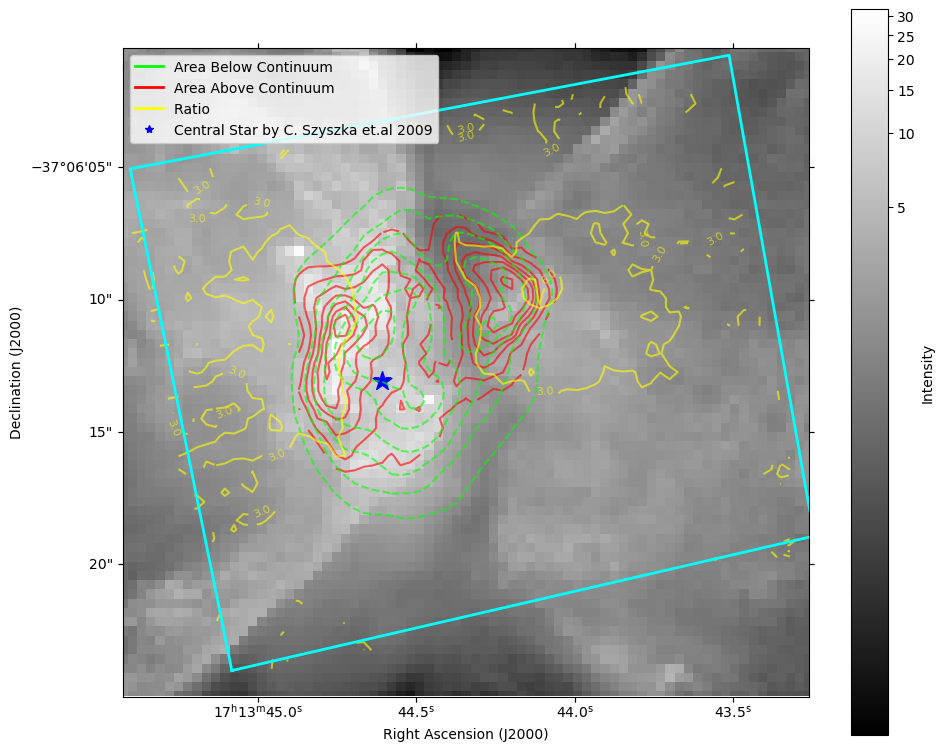

Angular distances between box vertices (in arcseconds): [<Angle 19.33494526 arcsec>, <Angle 23.0227625 arcsec>, <Angle 18.44030481 arcsec>, <Angle 22.57656963 arcsec>]


In [49]:
import numpy as np
import matplotlib.pyplot as plt
from mpdaf.obj import Cube
import astropy.units as u
import warnings
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS, FITSFixedWarning
from astropy.io import fits
from reproject import reproject_interp
from astropy.visualization import (MinMaxInterval, LogStretch, ImageNormalize)

# Ignore warnings
warnings.filterwarnings('ignore', category=FITSFixedWarning)
warnings.filterwarnings('ignore', category=UserWarning, message="Warning: converting a masked element to nan.")

# Load the optical image
optical_image_path = '/Users/mary/Downloads/F658N2009_tweak2F110W_drc_Gaia.fits'
optical_image_data, optical_image_header = fits.getdata(optical_image_path, header=True)
optical_wcs = WCS(optical_image_header)

# Load the data cube
cube_path = '/Users/mary/Fits image of JWST/ngc6302_ch4-long_s3d.fits'
obj1 = Cube(cube_path)

# Extract WCS from the FITS header of the data cube
cube_header = fits.getheader(cube_path, ext=1)  # Verify the correct extension
cube_wcs = WCS(cube_header).celestial  # Use only the celestial (spatial) part

# Load the saved maps
area_above_continuum_map = np.loadtxt('2224.5_area_above_continuum.txt')
area_below_continuum_map = np.loadtxt('2224.5_area_below_continuum.txt')
ratio_map = np.loadtxt('2224.5_ratio_map.txt')


# Define the RA and Dec coordinates of the central star
ra_deg = 258.43579167
dec_deg = -37.10359167
skycoord = SkyCoord(ra=ra_deg*u.degree, dec=dec_deg*u.degree, frame='icrs')

# Reproject the optical image to match the WCS of the data cube
reprojected_image, footprint = reproject_interp(
    (optical_image_data, optical_wcs), cube_wcs, shape_out=obj1.shape[1:]
)

# Check if the reprojected image is loaded correctly
if reprojected_image is None or reprojected_image.size == 0:
    raise ValueError("Reprojected image not loaded correctly.")

# Convert RA and Dec to pixel coordinates in the reprojected image
optical_pixel_coords = cube_wcs.world_to_pixel(skycoord)
optical_pixel_x, optical_pixel_y = int(optical_pixel_coords[0]), int(optical_pixel_coords[1])

# Apply a logarithmic scale to the image data
norm = ImageNormalize(reprojected_image, interval=MinMaxInterval(), stretch=LogStretch())

# Plot the reprojected optical image with contours
plt.figure(figsize=(10, 8))
ax = plt.subplot(projection=cube_wcs)

# Set plot limits to avoid cutting off the image and prevent white areas
ax.set_xlim(0, 74)  # Adjust these limits based on your data range
ax.set_ylim(0, 70)  # Adjust these limits based on your data range

# Display the reprojected image
im = ax.imshow(reprojected_image, cmap='gray', origin='lower', aspect='equal', norm=norm)

# Add color bar
plt.colorbar(im, ax=ax, label='Intensity')

# Calculate standard deviation for the ratio map, ignoring NaNs
std_ratio_map = np.nanstd(ratio_map)
print(f"Standard Deviation of Ratio Map: {std_ratio_map}")

# Calculate standard deviation for the area_above_continuum_map, ignoring NaNs
std_area_above_continuum_map = np.nanstd(area_above_continuum_map)
print(f"Standard Deviation of area_above_continuum_map: {std_area_above_continuum_map}")

# Filter the ratio map to only include values > std_ratio_map
#higher_threshold = std_ratio_map * 2
#filtered_ratio_map = np.where(np.isfinite(ratio_map) & (ratio_map > higher_threshold), ratio_map, np.nan)
filtered_ratio_map = np.where(ratio_map > 2, ratio_map, np.nan)
# Filter the area_above_continuum_map to only include values > std_area_above_continuum_map
filtered_area_above_continuum_map = np.where(area_above_continuum_map > std_area_above_continuum_map, area_above_continuum_map, np.nan)

# Overlay contours for the filtered ratio map
contour1 = ax.contour(filtered_area_above_continuum_map, colors='red', alpha=0.6, transform=ax.get_transform(cube_wcs))
contour2 = ax.contour(area_below_continuum_map, colors='lime', linestyles='--', alpha=0.6, transform=ax.get_transform(cube_wcs))
contour3 = ax.contour(filtered_ratio_map, colors='yellow', alpha=0.6, transform=ax.get_transform(cube_wcs))

# Label the contours of the filtered ratio map
ax.clabel(contour3, inline=True, fontsize=8, fmt='%1.1f')

# Define and plot specific points for the magenta box
specific_points = [
    (11.7641, 2.79749),
    (0.795407, 56.9403),
    (65.4217, 69.2025),
    (74.6117, 17.3236)
]
for x, y in specific_points:
    ax.scatter(x, y, color='red', s=50, marker='none', transform=ax.get_transform(cube_wcs))

# Connect the points to form a box
specific_points.append(specific_points[0])
x_coords, y_coords = zip(*specific_points)
ax.plot(x_coords, y_coords, color='cyan', linestyle='-', linewidth=2, transform=ax.get_transform(cube_wcs))

# Mark the central star
plt.scatter(optical_pixel_x, optical_pixel_y, color='blue', marker='*', s=200, label='Central Star by C. Szyszka et.al 2009')

# Add legend
red_patch = plt.Line2D([0], [0], color='lime', lw=2, label='Area Below Continuum')
blue_patch = plt.Line2D([0], [0], color='red', lw=2, label='Area Above Continuum')
green_patch = plt.Line2D([0], [0], color='yellow', lw=2, label='Ratio ')
plt.legend(handles=[red_patch, blue_patch, green_patch, plt.Line2D([0], [0], color='blue', marker='*', lw=0, label='Central Star by C. Szyszka et.al 2009')], loc='upper left')

# Set axis labels
ax.set_xlabel('Right Ascension (J2000)')
ax.set_ylabel('Declination (J2000)') 
ax.coords['ra'].set_ticklabel_position('b')
ax.coords['dec'].set_ticklabel_position('l')
plt.tight_layout()
plt.savefig('0k25modified_optical_image_with_box.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

# Check the angular size of the magenta box

# Convert pixel coordinates to world (RA/Dec) coordinates
world_coords = cube_wcs.pixel_to_world_values(np.array(x_coords), np.array(y_coords))

# Calculate the angular distance between consecutive points
from astropy.coordinates import SkyCoord
from astropy import units as u

ra_list, dec_list = world_coords[0], world_coords[1]
coord_list = SkyCoord(ra=ra_list, dec=dec_list, unit='deg')

# Calculate angular distances between consecutive vertices of the box
angular_distances = []
for i in range(len(coord_list) - 1):
    angular_distances.append(coord_list[i].separation(coord_list[i + 1]).to(u.arcsec))

# Print the angular distances
print("Angular distances between box vertices (in arcseconds):", angular_distances)

# Check if the box dimensions match the given coverage
box_width = angular_distances[1]  # Assuming the box's width is the distance between two horizontal points
box_height = angular_distances[0]  # Assuming the```



Standard Deviation of Ratio Map: 1.4915291843323994
Standard Deviation of area_above_continuum_map: 0.002011344459837386


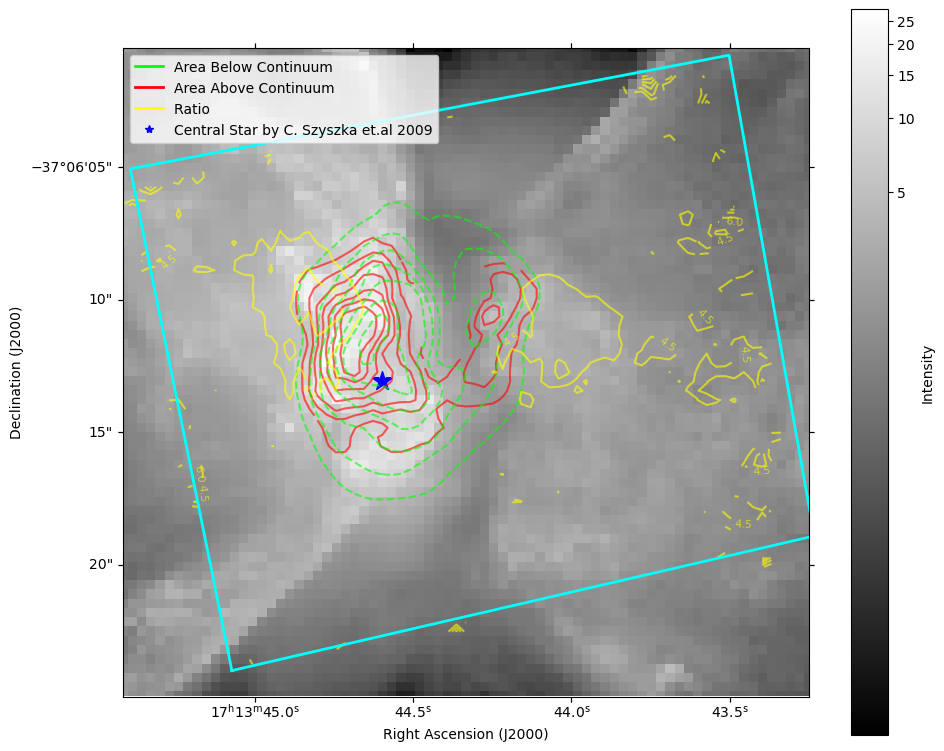

Angular distances between box vertices (in arcseconds): [<Angle 19.33494526 arcsec>, <Angle 23.0227625 arcsec>, <Angle 18.44030481 arcsec>, <Angle 22.57656963 arcsec>]


In [66]:
import numpy as np
import matplotlib.pyplot as plt
from mpdaf.obj import Cube
import astropy.units as u
import warnings
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS, FITSFixedWarning
from astropy.io import fits
from reproject import reproject_interp
from astropy.visualization import (MinMaxInterval, LogStretch, ImageNormalize)

# Ignore warnings
warnings.filterwarnings('ignore', category=FITSFixedWarning)
warnings.filterwarnings('ignore', category=UserWarning, message="Warning: converting a masked element to nan.")

# Load the optical image
optical_image_path = '/Users/mary/Downloads/F658N2009_tweak2F110W_drc_Gaia.fits'
optical_image_data, optical_image_header = fits.getdata(optical_image_path, header=True)
optical_wcs = WCS(optical_image_header)

# Load the data cube
cube_path = '/Users/mary/Fits image of JWST/ngc6302_ch4-short_s3d.fits'
obj1 = Cube(cube_path)

# Extract WCS from the FITS header of the data cube
cube_header = fits.getheader(cube_path, ext=1)  # Verify the correct extension
cube_wcs = WCS(cube_header).celestial  # Use only the celestial (spatial) part

# Load the saved maps
area_above_continuum_map = np.loadtxt('190000area_above_continuum.txt')
area_below_continuum_map = np.loadtxt('190000area_below_continuum.txt')
ratio_map = np.loadtxt('190000ratio_map.txt')

# Define the RA and Dec coordinates of the central star
ra_deg = 258.43579167
dec_deg = -37.10359167
skycoord = SkyCoord(ra=ra_deg*u.degree, dec=dec_deg*u.degree, frame='icrs')

# Reproject the optical image to match the WCS of the data cube
reprojected_image, footprint = reproject_interp(
    (optical_image_data, optical_wcs), cube_wcs, shape_out=obj1.shape[1:]
)

# Check if the reprojected image is loaded correctly
if reprojected_image is None or reprojected_image.size == 0:
    raise ValueError("Reprojected image not loaded correctly.")

# Convert RA and Dec to pixel coordinates in the reprojected image
optical_pixel_coords = cube_wcs.world_to_pixel(skycoord)
optical_pixel_x, optical_pixel_y = int(optical_pixel_coords[0]), int(optical_pixel_coords[1])

# Apply a logarithmic scale to the image data
norm = ImageNormalize(reprojected_image, interval=MinMaxInterval(), stretch=LogStretch())

# Plot the reprojected optical image with contours
plt.figure(figsize=(10, 8))
ax = plt.subplot(projection=cube_wcs)

# Set plot limits to avoid cutting off the image and prevent white areas
ax.set_xlim(0, 74)  # Adjust these limits based on your data range
ax.set_ylim(0, 70)  # Adjust these limits based on your data range

# Display the reprojected image
im = ax.imshow(reprojected_image, cmap='gray', origin='lower', aspect='equal', norm=norm)

# Add color bar
plt.colorbar(im, ax=ax, label='Intensity')

# Calculate standard deviation for the ratio map, ignoring NaNs
std_ratio_map = np.nanstd(ratio_map)
print(f"Standard Deviation of Ratio Map: {std_ratio_map}")

# Calculate standard deviation for the area_above_continuum_map, ignoring NaNs
std_area_above_continuum_map = np.nanstd(area_above_continuum_map)
print(f"Standard Deviation of area_above_continuum_map: {std_area_above_continuum_map}")

# Filter the ratio map to only include values > std_ratio_map
higher_threshold = std_ratio_map * 2
filtered_ratio_map = np.where(np.isfinite(ratio_map) & (ratio_map > higher_threshold), ratio_map, np.nan)

# Filter the area_above_continuum_map to only include values > std_area_above_continuum_map
filtered_area_above_continuum_map = np.where(area_above_continuum_map > std_area_above_continuum_map, area_above_continuum_map, np.nan)

# Overlay contours for the filtered ratio map
contour1 = ax.contour(filtered_area_above_continuum_map, colors='red', alpha=0.6, transform=ax.get_transform(cube_wcs))
contour2 = ax.contour(area_below_continuum_map, colors='lime', linestyles='--', alpha=0.6, transform=ax.get_transform(cube_wcs))
contour3 = ax.contour(filtered_ratio_map, colors='yellow', alpha=0.6, transform=ax.get_transform(cube_wcs))

# Label the contours of the filtered ratio map
ax.clabel(contour3, inline=True, fontsize=8, fmt='%1.1f')

# Define and plot specific points for the magenta box
specific_points = [
    (11.7641, 2.79749),
    (0.795407, 56.9403),
    (65.4217, 69.2025),
    (74.6117, 17.3236)
]
for x, y in specific_points:
    ax.scatter(x, y, color='red', s=50, marker='none', transform=ax.get_transform(cube_wcs))

# Connect the points to form a box
specific_points.append(specific_points[0])
x_coords, y_coords = zip(*specific_points)
ax.plot(x_coords, y_coords, color='cyan', linestyle='-', linewidth=2, transform=ax.get_transform(cube_wcs))

# Mark the central star
plt.scatter(optical_pixel_x, optical_pixel_y, color='blue', marker='*', s=200, label='Central Star by C. Szyszka et.al 2009')

# Add legend
red_patch = plt.Line2D([0], [0], color='lime', lw=2, label='Area Below Continuum')
blue_patch = plt.Line2D([0], [0], color='red', lw=2, label='Area Above Continuum')
green_patch = plt.Line2D([0], [0], color='yellow', lw=2, label='Ratio ')
plt.legend(handles=[red_patch, blue_patch, green_patch, plt.Line2D([0], [0], color='blue', marker='*', lw=0, label='Central Star by C. Szyszka et.al 2009')], loc='upper left')

# Set axis labels
ax.set_xlabel('Right Ascension (J2000)')
ax.set_ylabel('Declination (J2000)') 
ax.coords['ra'].set_ticklabel_position('b')
ax.coords['dec'].set_ticklabel_position('l')
plt.tight_layout()
plt.savefig('0k1900_optical_image_with_box.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

# Check the angular size of the magenta box

# Convert pixel coordinates to world (RA/Dec) coordinates
world_coords = cube_wcs.pixel_to_world_values(np.array(x_coords), np.array(y_coords))

# Calculate the angular distance between consecutive points
from astropy.coordinates import SkyCoord
from astropy import units as u

ra_list, dec_list = world_coords[0], world_coords[1]
coord_list = SkyCoord(ra=ra_list, dec=dec_list, unit='deg')

# Calculate angular distances between consecutive vertices of the box
angular_distances = []
for i in range(len(coord_list) - 1):
    angular_distances.append(coord_list[i].separation(coord_list[i + 1]).to(u.arcsec))

# Print the angular distances
print("Angular distances between box vertices (in arcseconds):", angular_distances)

# Check if the box dimensions match the given coverage
box_width = angular_distances[1]  # Assuming the box's width is the distance between two horizontal points
box_height = angular_distances[0]  # Assuming the```



Standard Deviation of area_above_continuum_map: 0.01237069368325079
Standard Deviation of Ratio Map: 2.0917576226929873


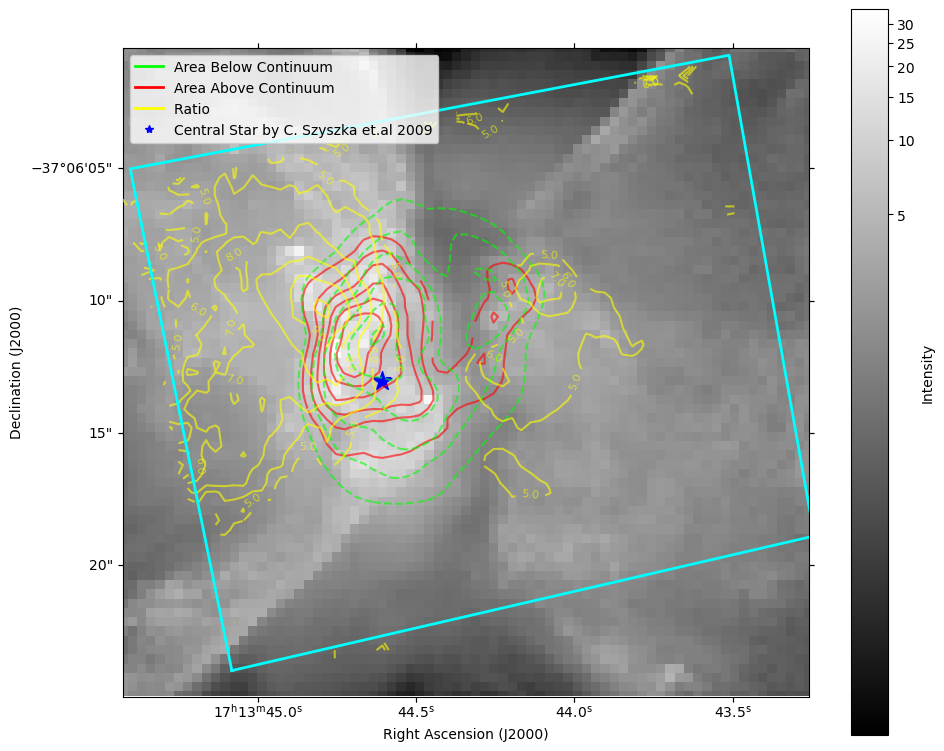

Angular distances between box vertices (in arcseconds): [<Angle 19.33494526 arcsec>, <Angle 23.0227625 arcsec>, <Angle 18.44030481 arcsec>, <Angle 22.57656963 arcsec>]
Box width: 23.02276250472216 arcsec, Given width: 22.9 arcsec
Box height: 19.334945255319546 arcsec, Given height: 19.3 arcsec
The box matches the given mapping coverage.


In [72]:
import numpy as np
import matplotlib.pyplot as plt
from mpdaf.obj import Cube
import astropy.units as u
import warnings
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS, FITSFixedWarning
from astropy.io import fits
from reproject import reproject_interp
from astropy.visualization import (MinMaxInterval, LogStretch, ImageNormalize)

# Ignore warnings
warnings.filterwarnings('ignore', category=FITSFixedWarning)
warnings.filterwarnings('ignore', category=UserWarning, message="Warning: converting a masked element to nan.")

# Load the optical image
optical_image_path = '/Users/mary/Downloads/F658N2009_tweak2F110W_drc_Gaia.fits'
optical_image_data, optical_image_header = fits.getdata(optical_image_path, header=True)
optical_wcs = WCS(optical_image_header)

# Load the data cube
cube_path = '/Users/mary/Fits image of JWST/ngc6302_ch4-medium_s3d.fits'
obj1 = Cube(cube_path)

# Extract WCS from the FITS header of the data cube
cube_header = fits.getheader(cube_path, ext=1)  # Verify the correct extension
cube_wcs = WCS(cube_header).celestial  # Use only the celestial (spatial) part

# Load the saved maps
area_above_continuum_map = np.loadtxt('1area_above_continuum.txt')
area_below_continuum_map = np.loadtxt('1area_below_continuum.txt')
ratio_map = np.loadtxt('1ratio_map.txt')

# Define the RA and Dec coordinates of the central star
ra_deg = 258.43579167
dec_deg = -37.10359167
skycoord = SkyCoord(ra=ra_deg*u.degree, dec=dec_deg*u.degree, frame='icrs')

# Reproject the optical image to match the WCS of the data cube
reprojected_image, footprint = reproject_interp(
    (optical_image_data, optical_wcs), cube_wcs, shape_out=obj1.shape[1:]
)

# Check if the reprojected image is loaded correctly
if reprojected_image is None or reprojected_image.size == 0:
    raise ValueError("Reprojected image not loaded correctly.")

# Convert RA and Dec to pixel coordinates in the reprojected image
optical_pixel_coords = cube_wcs.world_to_pixel(skycoord)
optical_pixel_x, optical_pixel_y = int(optical_pixel_coords[0]), int(optical_pixel_coords[1])

# Apply a logarithmic scale to the image data
norm = ImageNormalize(reprojected_image, interval=MinMaxInterval(), stretch=LogStretch())

# Plot the reprojected optical image with contours
plt.figure(figsize=(10, 8))
ax = plt.subplot(projection=cube_wcs)

# Set plot limits to avoid cutting off the image and prevent white areas
ax.set_xlim(0, 74)  # Adjust these limits based on your data range
ax.set_ylim(0, 70)  # Adjust these limits based on your data range

# Display the reprojected image
im = ax.imshow(reprojected_image, cmap='gray', origin='lower', aspect='equal', norm=norm)

# Add color bar
plt.colorbar(im, ax=ax, label='Intensity')

# Filter the ratio map to only include values > std_ratio_map
#higher_threshold = std_ratio_map * 2

#filtered_ratio_map = np.where(np.isfinite(ratio_map) & (ratio_map > higher_threshold), ratio_map, np.nan)

filtered_ratio_map = np.where(ratio_map >4.5, ratio_map, np.nan)
filtered_area_above_continuum_map = np.where(area_above_continuum_map > std_area_above_continuum_map, area_above_continuum_map, np.nan)
# Overlay contours for the filtered ratio map
contour1 = ax.contour(filtered_area_above_continuum_map, colors='red', alpha=0.6, transform=ax.get_transform(cube_wcs))
contour2 = ax.contour(area_below_continuum_map, colors='lime',linestyles='--', alpha=0.6, transform=ax.get_transform(cube_wcs))
contour3 = ax.contour(filtered_ratio_map, colors='yellow', alpha=0.6, transform=ax.get_transform(cube_wcs))
# Label the contours of the filtered ratio map
ax.clabel(contour3, inline=True, fontsize=8, fmt='%1.1f')
# Calculate standard deviation for the area_above_continuum_map, ignoring NaNs
std_area_above_continuum_map = np.nanstd(area_above_continuum_map)
print(f"Standard Deviation of area_above_continuum_map: {std_area_above_continuum_map}")


# Calculate standard deviation for the ratio map, ignoring NaNs
std_ratio_map = np.nanstd(ratio_map)
print(f"Standard Deviation of Ratio Map: {std_ratio_map}")

# Define and plot specific points for the magenta box
specific_points = [
    (11.7641, 2.79749),
    (0.795407, 56.9403),
    (65.4217, 69.2025),
    (74.6117, 17.3236)
]
for x, y in specific_points:
    ax.scatter(x, y, color='red', s=50, marker='none', transform=ax.get_transform(cube_wcs))

# Connect the points to form a box
specific_points.append(specific_points[0])
x_coords, y_coords = zip(*specific_points)
ax.plot(x_coords, y_coords, color='cyan', linestyle='-', linewidth=2, transform=ax.get_transform(cube_wcs))


# Mark the central star
plt.scatter(optical_pixel_x, optical_pixel_y, color='blue', marker='*', s=200, label='Central Star by C. Szyszka et.al 2009')


# Add legend
red_patch = plt.Line2D([0], [0], color='lime', lw=2, label='Area Below Continuum')
blue_patch = plt.Line2D([0], [0], color='red', lw=2, label='Area Above Continuum')
green_patch = plt.Line2D([0], [0], color='yellow', lw=2, label='Ratio ')
plt.legend(handles=[red_patch, blue_patch, green_patch, plt.Line2D([0], [0], color='blue', marker='*', lw=0, label='Central Star by C. Szyszka et.al 2009')], loc='upper left')


# Set axis labels
ax.set_xlabel('Right Ascension (J2000)')
ax.set_ylabel('Declination (J2000)') 
ax.coords['ra'].set_ticklabel_position('b')
ax.coords['dec'].set_ticklabel_position('l')
plt.tight_layout()
plt.savefig('ok23modified_optical_image_with_box.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

# Check the angular size of the magenta box

# Convert pixel coordinates to world (RA/Dec) coordinates
world_coords = cube_wcs.pixel_to_world_values(np.array(x_coords), np.array(y_coords))

# Calculate the angular distance between consecutive points
from astropy.coordinates import SkyCoord
from astropy import units as u

ra_list, dec_list = world_coords[0], world_coords[1]
coord_list = SkyCoord(ra=ra_list, dec=dec_list, unit='deg')

# Calculate angular distances between consecutive vertices of the box
angular_distances = []
for i in range(len(coord_list) - 1):
    angular_distances.append(coord_list[i].separation(coord_list[i + 1]).to(u.arcsec))

# Print the angular distances
print("Angular distances between box vertices (in arcseconds):", angular_distances)

# Check if the box dimensions match the given coverage
box_width = angular_distances[1]  # Assuming the box's width is the distance between two horizontal points
box_height = angular_distances[0]  # Assuming the box's height is the distance between two vertical points

# Given coverage dimensions
mapping_width = 22.9 * u.arcsec
mapping_height = 19.3 * u.arcsec

# Print the comparison results
print(f"Box width: {box_width}, Given width: {mapping_width}")
print(f"Box height: {box_height}, Given height: {mapping_height}")

# Check if the box matches the coverage
if np.isclose(box_width.value, mapping_width.value, rtol=0.05) and np.isclose(box_height.value, mapping_height.value, rtol=0.05):
    print("The box matches the given mapping coverage.")
else:
    print("The box does not match the given mapping coverage.")



Standard Deviation of area_above_continuum_map: 0.01562830922470268
Standard Deviation of Ratio Map: 2.721929814568154


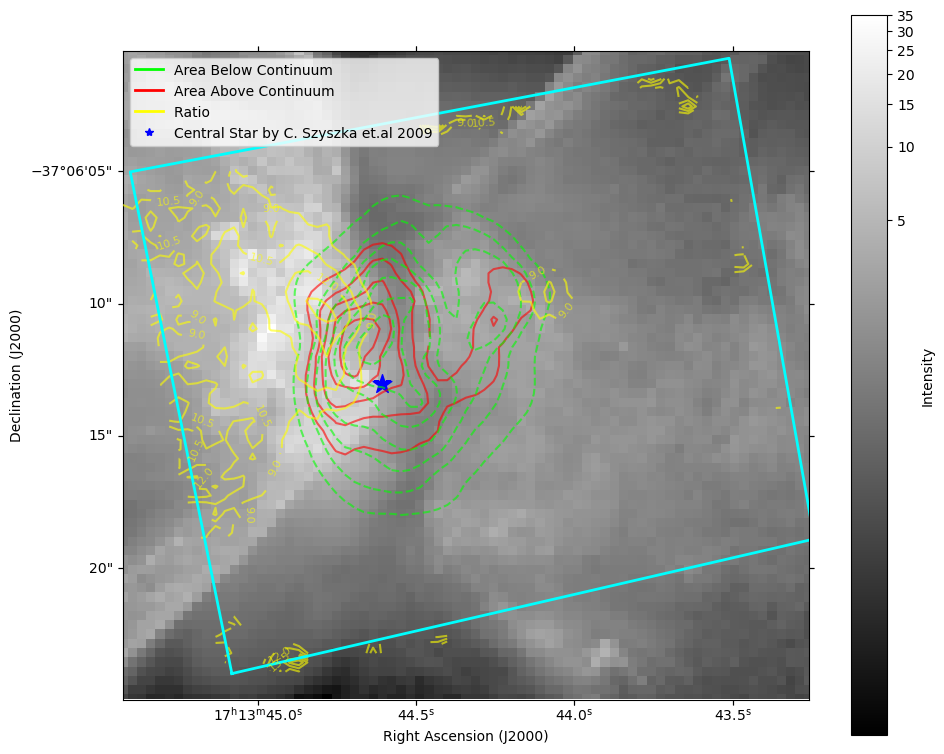

Angular distances between box vertices (in arcseconds): [<Angle 19.33494526 arcsec>, <Angle 23.0227625 arcsec>, <Angle 18.44030481 arcsec>, <Angle 22.57656963 arcsec>]
Box width: 23.02276250472216 arcsec, Given width: 22.9 arcsec
Box height: 19.334945255319546 arcsec, Given height: 19.3 arcsec
The box matches the given mapping coverage.


In [79]:
import numpy as np
import matplotlib.pyplot as plt
from mpdaf.obj import Cube
import astropy.units as u
import warnings
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS, FITSFixedWarning
from astropy.io import fits
from reproject import reproject_interp
from astropy.visualization import (MinMaxInterval, LogStretch, ImageNormalize)

# Ignore warnings
warnings.filterwarnings('ignore', category=FITSFixedWarning)
warnings.filterwarnings('ignore', category=UserWarning, message="Warning: converting a masked element to nan.")

# Load the optical image
optical_image_path = '/Users/mary/Downloads/hst_11504_01_wfc3_uvis_f658n_sci.fits'
optical_image_data, optical_image_header = fits.getdata(optical_image_path, header=True)
optical_wcs = WCS(optical_image_header)

# Load the data cube
cube_path = '/Users/mary/Fits image of JWST/ngc6302_ch4-medium_s3d.fits'
obj1 = Cube(cube_path)

# Extract WCS from the FITS header of the data cube
cube_header = fits.getheader(cube_path, ext=1)  # Verify the correct extension
cube_wcs = WCS(cube_header).celestial  # Use only the celestial (spatial) part

# Load the saved maps
area_above_continuum_map = np.loadtxt('01area_above_continuum.txt')
area_below_continuum_map = np.loadtxt('01area_below_continuum.txt')
ratio_map = np.loadtxt('01ratio_map.txt')

# Define the RA and Dec coordinates of the central star
ra_deg = 258.43579167
dec_deg = -37.10359167
skycoord = SkyCoord(ra=ra_deg*u.degree, dec=dec_deg*u.degree, frame='icrs')

# Reproject the optical image to match the WCS of the data cube
reprojected_image, footprint = reproject_interp(
    (optical_image_data, optical_wcs), cube_wcs, shape_out=obj1.shape[1:]
)

# Check if the reprojected image is loaded correctly
if reprojected_image is None or reprojected_image.size == 0:
    raise ValueError("Reprojected image not loaded correctly.")

# Convert RA and Dec to pixel coordinates in the reprojected image
optical_pixel_coords = cube_wcs.world_to_pixel(skycoord)
optical_pixel_x, optical_pixel_y = int(optical_pixel_coords[0]), int(optical_pixel_coords[1])

# Apply a logarithmic scale to the image data
norm = ImageNormalize(reprojected_image, interval=MinMaxInterval(), stretch=LogStretch())

# Plot the reprojected optical image with contours
plt.figure(figsize=(10, 8))
ax = plt.subplot(projection=cube_wcs)

# Set plot limits to avoid cutting off the image and prevent white areas
ax.set_xlim(0, 74)  # Adjust these limits based on your data range
ax.set_ylim(0, 70)  # Adjust these limits based on your data range

# Display the reprojected image
im = ax.imshow(reprojected_image, cmap='gray', origin='lower', aspect='equal', norm=norm)

# Add color bar
plt.colorbar(im, ax=ax, label='Intensity')

# Filter the ratio map to only include values > std_ratio_map
higher_threshold = std_ratio_map*3

filtered_ratio_map = np.where(np.isfinite(ratio_map) & (ratio_map > higher_threshold), ratio_map, np.nan)

#filtered_ratio_map = np.where(ratio_map >4.5, ratio_map, np.nan)
filtered_area_above_continuum_map = np.where(area_above_continuum_map > std_area_above_continuum_map, area_above_continuum_map, np.nan)
# Overlay contours for the filtered ratio map
contour1 = ax.contour(filtered_area_above_continuum_map, colors='red', alpha=0.6, transform=ax.get_transform(cube_wcs))
contour2 = ax.contour(area_below_continuum_map, colors='lime',linestyles='--', alpha=0.6, transform=ax.get_transform(cube_wcs))
contour3 = ax.contour(filtered_ratio_map, colors='yellow', alpha=0.6, transform=ax.get_transform(cube_wcs))
# Label the contours of the filtered ratio map
ax.clabel(contour3, inline=True, fontsize=8, fmt='%1.1f')
# Calculate standard deviation for the area_above_continuum_map, ignoring NaNs
std_area_above_continuum_map = np.nanstd(area_above_continuum_map)
print(f"Standard Deviation of area_above_continuum_map: {std_area_above_continuum_map}")


# Calculate standard deviation for the ratio map, ignoring NaNs
std_ratio_map = np.nanstd(ratio_map)
print(f"Standard Deviation of Ratio Map: {std_ratio_map}")

# Define and plot specific points for the magenta box
specific_points = [
    (11.7641, 2.79749),
    (0.795407, 56.9403),
    (65.4217, 69.2025),
    (74.6117, 17.3236)
]
for x, y in specific_points:
    ax.scatter(x, y, color='red', s=50, marker='none', transform=ax.get_transform(cube_wcs))

# Connect the points to form a box
specific_points.append(specific_points[0])
x_coords, y_coords = zip(*specific_points)
ax.plot(x_coords, y_coords, color='cyan', linestyle='-', linewidth=2, transform=ax.get_transform(cube_wcs))


# Mark the central star
plt.scatter(optical_pixel_x, optical_pixel_y, color='blue', marker='*', s=200, label='Central Star by C. Szyszka et.al 2009')


# Add legend
red_patch = plt.Line2D([0], [0], color='lime', lw=2, label='Area Below Continuum')
blue_patch = plt.Line2D([0], [0], color='red', lw=2, label='Area Above Continuum')
green_patch = plt.Line2D([0], [0], color='yellow', lw=2, label='Ratio ')
plt.legend(handles=[red_patch, blue_patch, green_patch, plt.Line2D([0], [0], color='blue', marker='*', lw=0, label='Central Star by C. Szyszka et.al 2009')], loc='upper left')


# Set axis labels
ax.set_xlabel('Right Ascension (J2000)')
ax.set_ylabel('Declination (J2000)') 
ax.coords['ra'].set_ticklabel_position('b')
ax.coords['dec'].set_ticklabel_position('l')
plt.tight_layout()
plt.savefig('ok23modified_optical_image_with_box.png', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

# Check the angular size of the magenta box

# Convert pixel coordinates to world (RA/Dec) coordinates
world_coords = cube_wcs.pixel_to_world_values(np.array(x_coords), np.array(y_coords))

# Calculate the angular distance between consecutive points
from astropy.coordinates import SkyCoord
from astropy import units as u

ra_list, dec_list = world_coords[0], world_coords[1]
coord_list = SkyCoord(ra=ra_list, dec=dec_list, unit='deg')

# Calculate angular distances between consecutive vertices of the box
angular_distances = []
for i in range(len(coord_list) - 1):
    angular_distances.append(coord_list[i].separation(coord_list[i + 1]).to(u.arcsec))

# Print the angular distances
print("Angular distances between box vertices (in arcseconds):", angular_distances)

# Check if the box dimensions match the given coverage
box_width = angular_distances[1]  # Assuming the box's width is the distance between two horizontal points
box_height = angular_distances[0]  # Assuming the box's height is the distance between two vertical points

# Given coverage dimensions
mapping_width = 22.9 * u.arcsec
mapping_height = 19.3 * u.arcsec

# Print the comparison results
print(f"Box width: {box_width}, Given width: {mapping_width}")
print(f"Box height: {box_height}, Given height: {mapping_height}")

# Check if the box matches the coverage
if np.isclose(box_width.value, mapping_width.value, rtol=0.05) and np.isclose(box_height.value, mapping_height.value, rtol=0.05):
    print("The box matches the given mapping coverage.")
else:
    print("The box does not match the given mapping coverage.")



In [88]:
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
from mpdaf.obj import Cube
from scipy import stats
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS

# Load the data cube
cube_path = '/Users/mary/Fits image of JWST/ngc6302_ch4-medium_s3d.fits'
obj1 = Cube(cube_path)

# Get the WCS information from the cube
wcs = obj1.wcs.wcs

# Define the RA and Dec coordinates of the central star
ra_deg = 258.43579167  # RA in degrees (17h13m44.39s converted to degrees)
dec_deg = -37.10359167  # Dec in degrees (-37°06′12.93″ converted to degrees)

# Convert RA and Dec to pixel coordinates
skycoord = SkyCoord(ra=ra_deg*u.degree, dec=dec_deg*u.degree, frame='icrs')
pixcoords = wcs.world_to_pixel(skycoord)

# Extract pixel coordinates and convert to integers
pixel_x, pixel_y = int(pixcoords[0]), int(pixcoords[1])

# Combine pixel coordinates into a tuple
central_star_coords = (pixel_x, pixel_y)

# Get the pixel size and calculate the solid angle
pixel_size = obj1.wcs.get_step(unit=u.arcsec)[0]
solid_angle = (pixel_size * u.arcsec).to(u.rad)**2

from scipy.signal import savgol_filter

def calculate_noise_for_pixel(filtered_wavelengths, filtered_flux_density, window_size=5, poly_order=3):
    """
    Calculate noise level for a pixel by fitting a continuum and calculating the residuals.
    Apply a Savitzky-Golay filter to smooth the spectrum.
    """
    # Smooth the flux to reduce noise
    smoothed_flux_density = savgol_filter(filtered_flux_density, window_size, poly_order)

    # Define noise regions dynamically, avoiding regions of high flux
    left_noise_mask = (filtered_wavelengths >= 22.0) & (filtered_wavelengths <= 22.35)
    right_noise_mask = (filtered_wavelengths >= 24.1) & (filtered_wavelengths <= 24.29)

    left_noise_flux = smoothed_flux_density[left_noise_mask]
    right_noise_flux = smoothed_flux_density[right_noise_mask]

    left_wavelengths = filtered_wavelengths[left_noise_mask]
    right_wavelengths = filtered_wavelengths[right_noise_mask]

    # Handle cases where there is no valid data in the noise regions
    if len(left_wavelengths) == 0 or len(right_wavelengths) == 0:
        return np.inf

    # Weighted linear regression (continuum fitting)
    left_slope, left_intercept, _, _, _ = stats.linregress(left_wavelengths, left_noise_flux)
    right_slope, right_intercept, _, _, _ = stats.linregress(right_wavelengths, right_noise_flux)

    # Calculate residuals and noise levels
    left_continuum_fit = left_slope * left_wavelengths + left_intercept
    right_continuum_fit = right_slope * right_wavelengths + right_intercept
    left_residuals = left_noise_flux - left_continuum_fit
    right_residuals = right_noise_flux - right_continuum_fit

    # Calculate standard deviation (σ) of residuals
    left_noise_std_dev = np.std(left_residuals)
    right_noise_std_dev = np.std(right_residuals)

    # Average noise level (σ)
    avg_noise_std_dev = (left_noise_std_dev + right_noise_std_dev) / 2

    return avg_noise_std_dev

# Example usage in pixel processing
def process_pixel_data_with_smoothing(cube, solid_angle, central_star_coords):
    wavelength = cube.wave.coord()
    mask_range = (wavelength >= 22.4) & (wavelength <= 24.05)
    filtered_wavelengths = wavelength[mask_range]

    area_above_continuum_map = np.zeros((cube.shape[1], cube.shape[2]))
    ratio_map = np.zeros((cube.shape[1], cube.shape[2]))

    for x in range(cube.shape[1]):
        for y in range(cube.shape[2]):
            pixel_flux_density = cube.data[:, x, y] * solid_angle.value * 1e6
            filtered_pixel_flux_density = pixel_flux_density[mask_range]

            # Apply noise calculation with smoothing
            noise_level = calculate_noise_for_pixel(filtered_wavelengths, filtered_pixel_flux_density)

            # Calculate the continuum using a smoother fit
            mask_start = (filtered_wavelengths >= 22.66) & (filtered_wavelengths <= 22.86)
            mask_end = (filtered_wavelengths >= 23.52) & (filtered_wavelengths <= 23.72)
            continuum_start = np.mean(filtered_pixel_flux_density[mask_start])
            continuum_end = np.mean(filtered_pixel_flux_density[mask_end])

            wavelengths = [22.76, 23.62]
            average_intensities = [continuum_start, continuum_end]
            pixel_continuum_line = np.interp(filtered_wavelengths, wavelengths, average_intensities)

            total_area = np.trapz(filtered_pixel_flux_density, filtered_wavelengths)
            area_below_continuum = np.trapz(pixel_continuum_line, filtered_wavelengths)
            area_above_continuum = total_area - area_below_continuum

            # Calculate the peak height and compare to noise
            peak_flux = np.max(filtered_pixel_flux_density)
            peak_height = peak_flux - np.mean(pixel_continuum_line)

            # Apply noise threshold: if peak height is greater than 3σ, include in the map
            if peak_height > 3 * noise_level:
                area_above_continuum_map[x, y] = area_above_continuum
                if area_below_continuum != 0:
                    ratio_map[x, y] = area_above_continuum / area_below_continuum
                else:
                    ratio_map[x, y] = np.nan
            else:
                area_above_continuum_map[x, y] = np.nan
                ratio_map[x, y] = np.nan

    # Save the data and plot the area map as before
    np.savetxt('smoothed_area_above_continuum.txt', area_above_continuum_map, fmt='%.6f')
    np.savetxt('smoothed_ratio_map.txt', ratio_map, fmt='%.6f')

    plt.figure(figsize=(10, 8))
    plt.imshow(area_above_continuum_map, cmap='viridis', origin='lower')
    plt.colorbar(label='Area Above Continuum (Jy*µm)')
    plt.title('Map of Area Above Continuum (with Smoothing and Noise Threshold)')
    plt.contour(area_above_continuum_map, colors='white', alpha=0.5)
    plt.scatter(*central_star_coords, color='red', marker='*', s=100, label='Central Star')
    plt.legend()
    plt.savefig('smoothed_area_above_continuum_map.png', dpi=300, bbox_inches='tight')
    plt.show()
